In [1]:
###IMPORTING THE REQUIRED LIBARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)

#feature engineering
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import SplineTransformer, OneHotEncoder, PowerTransformer, RobustScaler, FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.decomposition import PCA


In [2]:
###LOADING THE DATASETS 
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df.drop(columns=['ID_LAT_LON_YEAR_WEEK'], inplace =True)
test.drop(columns=['ID_LAT_LON_YEAR_WEEK'], inplace =True)

In [4]:
df

latitude  longitude  year  week_no  \
0        -0.510     29.290  2019        0   
1        -0.510     29.290  2019        1   
2        -0.510     29.290  2019        2   
3        -0.510     29.290  2019        3   
4        -0.510     29.290  2019        4   
...         ...        ...   ...      ...   
79018    -3.299     30.301  2021       48   
79019    -3.299     30.301  2021       49   
79020    -3.299     30.301  2021       50   
79021    -3.299     30.301  2021       51   
79022    -3.299     30.301  2021       52   

       SulphurDioxide_SO2_column_number_density  \
0                                     -0.000108   
1                                      0.000021   
2                                      0.000514   
3                                           NaN   
4                                     -0.000079   
...                                         ...   
79018                                  0.000284   
79019                                  0.000083   
79020                                       NaN   
79021                                 -0.000034   
79022                                 -0.000091   

       SulphurDioxide_SO2_column_number_density_amf  \
0                                          0.603019   
1                                          0.728214   
2                                          0.748199   
3                                               NaN   
4                                          0.676296   
...                                             ...   
79018                                      1.195643   
79019                                      1.130868   
79020                                           NaN   
79021                                      0.879397   
79022                                      0.871951   

       SulphurDioxide_SO2_slant_column_number_density  \
0                                           -0.000065   
1                                            0.000014   
2                                            0.000385   
3                                                 NaN   
4                                           -0.000048   
...                                               ...   
79018                                        0.000340   
79019                                        0.000063   
79020                                             NaN   
79021                                       -0.000028   
79022                                       -0.000079   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                           0.255668                           -98.593887   
1                           0.130988                            16.592861   
2                           0.110018                            72.795837   
3                                NaN                                  NaN   
4                           0.121164                             4.121269   
...                              ...                                  ...   
79018                       0.191313                            72.820518   
79019                       0.177222                           -12.856753   
79020                            NaN                                  NaN   
79021                       0.184209                          -100.344827   
79022                       0.000000                            76.825638   

       SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                               50.843559                         -130.050797   
1                               39.137194                         -140.874435   
2                               52.868816                         -150.191757   
3                                     NaN                                 NaN   
4                               35.515587                         -137.409159   
...                                   ...                                 ...   
79018          

In [5]:
#### cheking for data types
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Columns: 75 entries, latitude to emission
dtypes: float64(73), int64(2)
memory usage: 45.2 MB


In [6]:
#### cheking for data types
test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Columns: 74 entries, latitude to Cloud_solar_zenith_angle
dtypes: float64(72), int64(2)
memory usage: 13.7 MB


In [7]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns in the train dataset')
print(f'We have {test.shape[0]} rows and {test.shape[1]} columns in the test dataset')

We have 79023 rows and 75 columns in the train dataset
We have 24353 rows and 74 columns in the test dataset


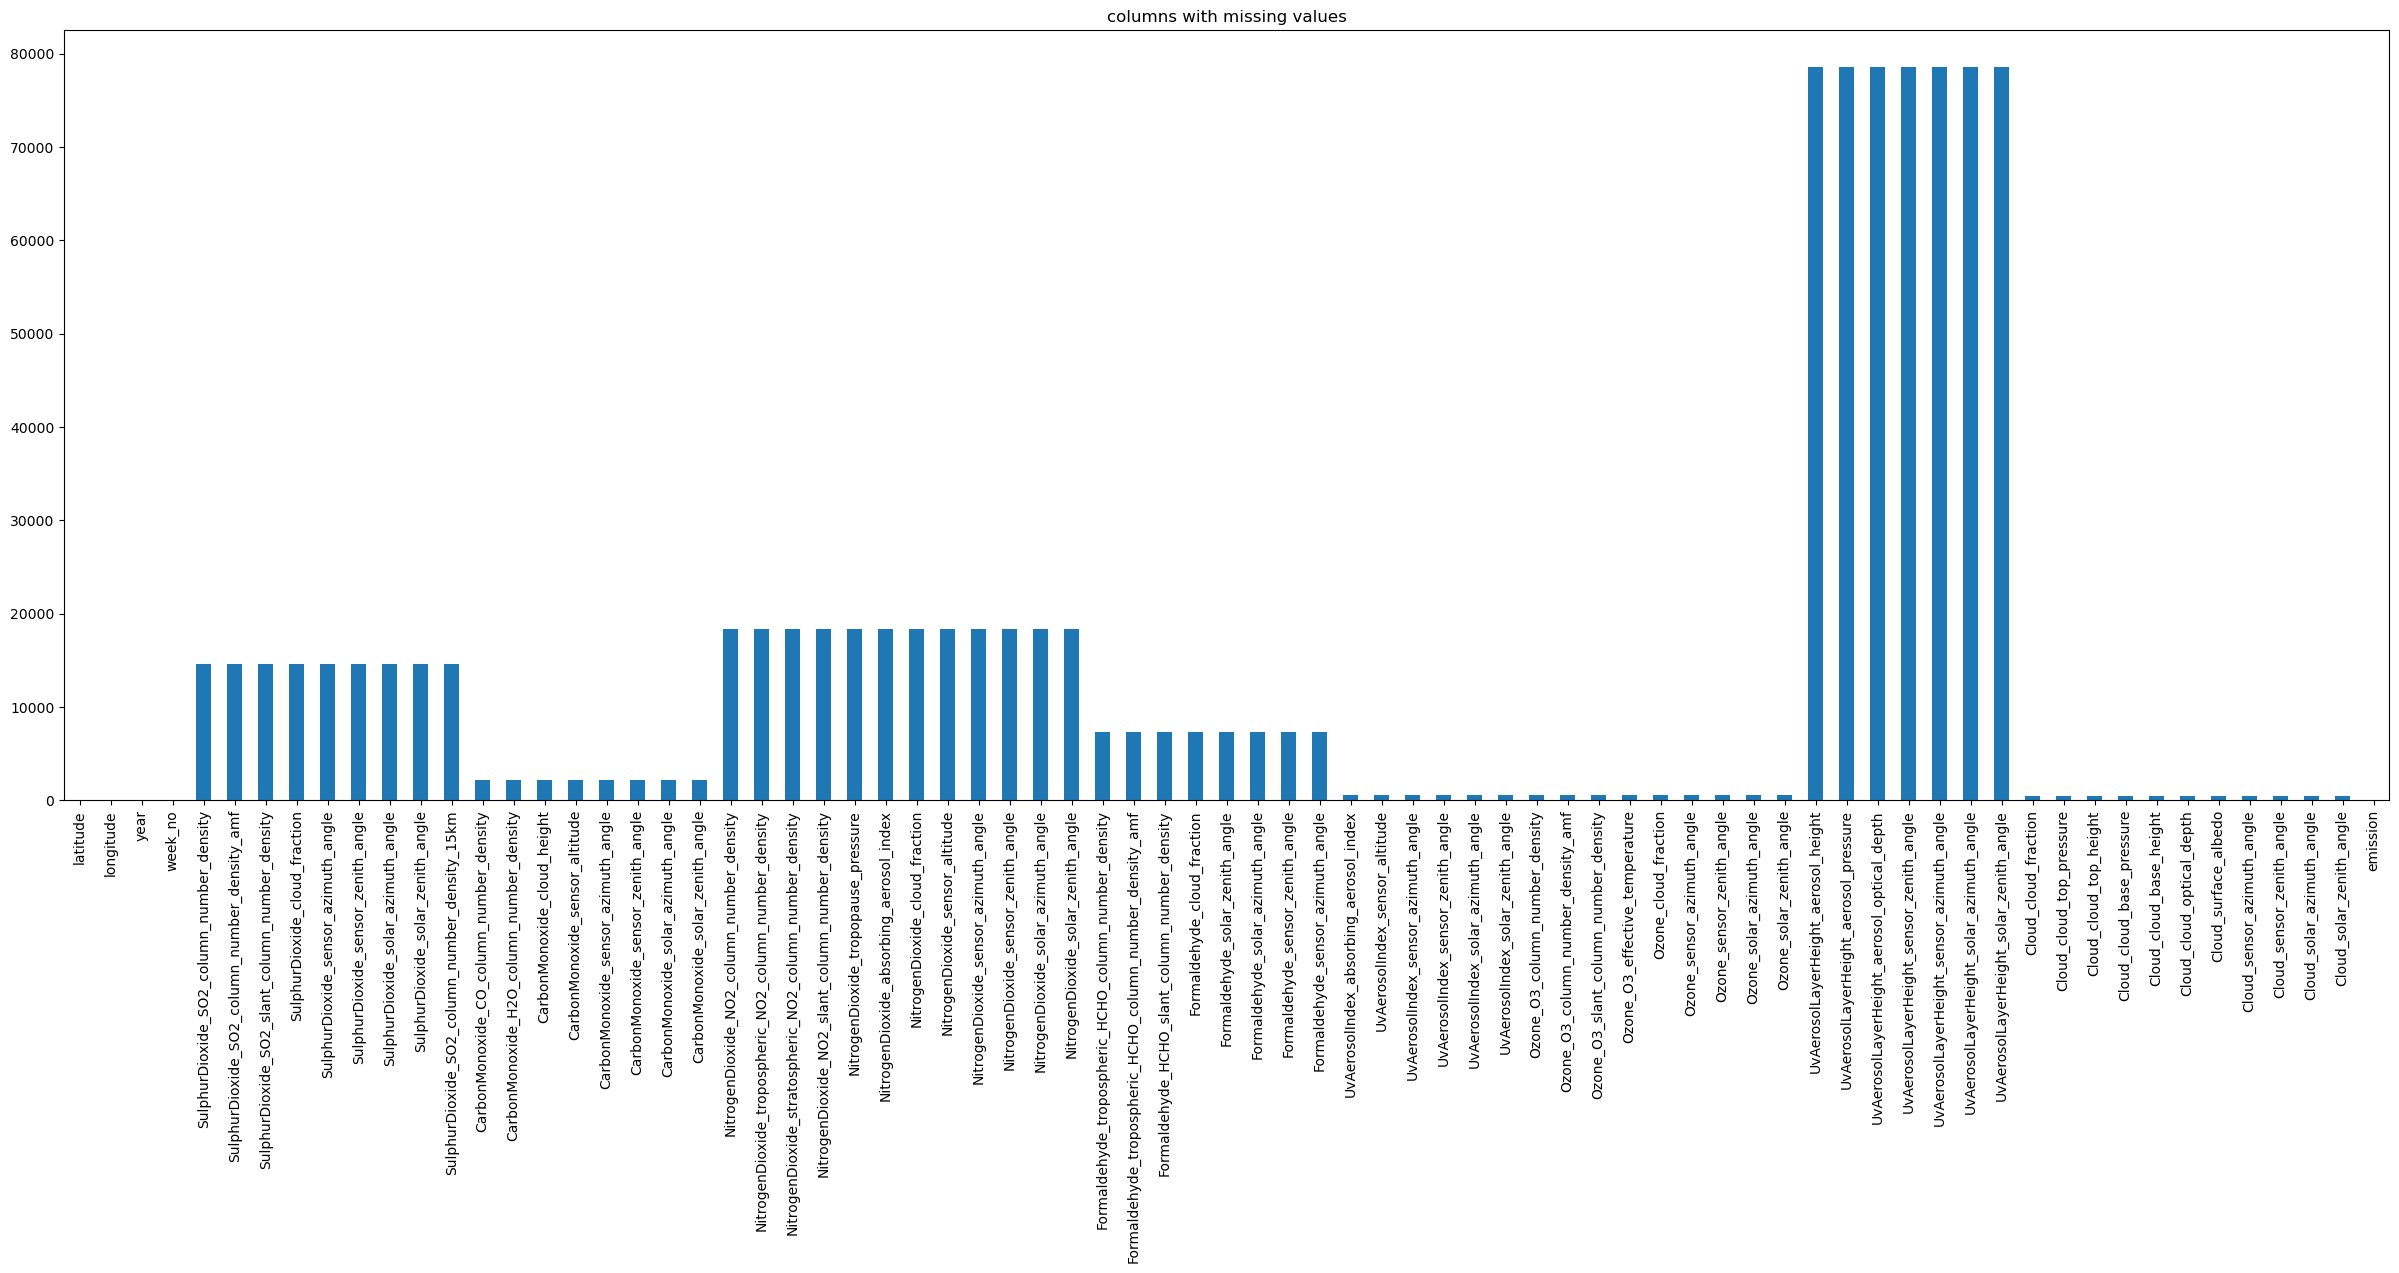

In [8]:
##NULL VALUES
plt.figure(figsize=(30,10))
plt.title(f'columns with missing values')
null = df.isna().sum()
null.plot(kind = 'bar')
plt.show()

In [9]:
missing_values = pd.DataFrame(index=test.columns)
missing_values["MissingTrain"] = df.isna().sum()
missing_values["MissingTrainRatio"] = missing_values['MissingTrain'] / len(df)
missing_values["MissingTest"] = test.isna().sum()
missing_values["MissingTestRatio"] = missing_values['MissingTest'] / len(test)
missing_values


MissingTrain  \
latitude                                                       0   
longitude                                                      0   
year                                                           0   
week_no                                                        0   
SulphurDioxide_SO2_column_number_density                   14609   
SulphurDioxide_SO2_column_number_density_amf               14609   
SulphurDioxide_SO2_slant_column_number_density             14609   
SulphurDioxide_cloud_fraction                              14609   
SulphurDioxide_sensor_azimuth_angle                        14609   
SulphurDioxide_sensor_zenith_angle                         14609   
SulphurDioxide_solar_azimuth_angle                         14609   
SulphurDioxide_solar_zenith_angle                          14609   
SulphurDioxide_SO2_column_number_density_15km              14609   
CarbonMonoxide_CO_column_number_density                     2122   
CarbonMonoxide_H2O_column_number_density                    2122   
CarbonMonoxide_cloud_height                                 2122   
CarbonMonoxide_sensor_altitude                              2122   
CarbonMonoxide_sensor_azimuth_angle                         2122   
CarbonMonoxide_sensor_zenith_angle                          2122   
CarbonMonoxide_solar_azimuth_angle                          2122   
CarbonMonoxide_solar_zenith_angle                           2122   
NitrogenDioxide_NO2_column_number_density                  18320   
NitrogenDioxide_tropospheric_NO2_column_number_...         18320   
NitrogenDioxide_stratospheric_NO2_column_number...         18320   
NitrogenDioxide_NO2_slant_column_number_density            18320   
NitrogenDioxide_tropopause_pressure                        18320   
NitrogenDioxide_absorbing_aerosol_index                    18320   
NitrogenDioxide_cloud_fraction                             18320   
NitrogenDioxide_sensor_altitude                            18320   
NitrogenDioxide_sensor_azimuth_angle                       18320   
NitrogenDioxide_sensor_zenith_angle                        18320   
NitrogenDioxide_solar_azimuth_angle                        18320   
NitrogenDioxide_solar_zenith_angle                         18320   
Formaldehyde_tropospheric_HCHO_column_number_de...          7277   
Formaldehyde_tropospheric_HCHO_column_number_de...          7277   
Formaldehyde_HCHO_slant_column_number_density               7277   
Formaldehyde_cloud_fraction                                 7277   
Formaldehyde_solar_zenith_angle                             7277   
Formaldehyde_solar_azimuth_angle                            7277   
Formaldehyde_sensor_zenith_angle                            7277   
Formaldehyde_sensor_azimuth_angle                           7277   
UvAerosolIndex_absorbing_aerosol_index                       539   
UvAerosolIndex_sensor_altitude                               539   
UvAerosolIndex_sensor_azimuth_angle                          539   
UvAerosolIndex_sensor_zenith_angle                           539   
UvAerosolIndex_solar_azimuth_angle                           539   
UvAerosolIndex_solar_zenith_angle                            539   
Ozone_O3_column_number_density                               548   
Ozone_O3_column_number_density_amf                           548   
Ozone_O3_slant_column_number_density                         548   
Ozone_O3_effective_temperature                               548   
Ozone_cloud_fraction                                         548   
Ozone_sensor_azimuth_angle                                   548   
Ozone_sensor_zenith_angle                                    548   
Ozone_solar_azimuth_angle                                    548   
Ozone_solar_zenith_angle                                     548   
UvAerosolLayerHeight_aerosol_height                        78584   
UvAerosolLayerHeight_aerosol_pressure                      78584   
UvAerosolLayerHeight_aerosol_optical_dep

In [10]:
col_missing = [ ]
for col in df.columns:
    percent_missing = (df[col].isnull().sum() * 100) / len(df)
    if percent_missing >= 40:
        col_missing.append(col)


In [11]:
col_missing

['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_solar_zenith_angle']

In [12]:
col_drop = ['Formaldehyde_tropospheric_HCHO_column_number_density',
'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
'Formaldehyde_HCHO_slant_column_number_density' ,
'Formaldehyde_cloud_fraction',
'Formaldehyde_solar_zenith_angle',
'Formaldehyde_solar_azimuth_angle',
'Formaldehyde_sensor_zenith_angle',
'Formaldehyde_sensor_azimuth_angle',
'Cloud_cloud_fraction',
'Cloud_cloud_top_pressure', 
'Cloud_cloud_top_height',
'Cloud_cloud_base_pressure',
'Cloud_cloud_base_height',
'Cloud_cloud_optical_depth',
'Cloud_surface_albedo',
'Cloud_sensor_azimuth_angle',
'Cloud_sensor_zenith_angle',
'Cloud_solar_azimuth_angle',
'Cloud_solar_zenith_angle',
'UvAerosolIndex_absorbing_aerosol_index', 
'UvAerosolIndex_sensor_altitude',
'UvAerosolIndex_sensor_azimuth_angle',
'UvAerosolIndex_sensor_zenith_angle',
'UvAerosolIndex_solar_azimuth_angle',
'UvAerosolIndex_solar_zenith_angle', 
'SulphurDioxide_sensor_azimuth_angle', 
'SulphurDioxide_sensor_zenith_angle',
'SulphurDioxide_solar_azimuth_angle',
'SulphurDioxide_solar_zenith_angle',
'SulphurDioxide_SO2_column_number_density_15km',
'NitrogenDioxide_NO2_slant_column_number_density',
'NitrogenDioxide_absorbing_aerosol_index',
'NitrogenDioxide_solar_zenith_angle']            

In [13]:
##DROPIING COLUMNS WITH MORE THAN 40%
df = df.drop(col_missing, axis =1 )
test = test.drop(col_missing, axis =1 )

In [14]:
##DROPIING COLUMNS WITH MORE THAN 40%
df = df.drop(col_drop, axis =1 )
test = test.drop(col_drop, axis =1 )

In [15]:
columns= ['Ozone_solar_azimuth_angle', 
'SulphurDioxide_SO2_column_number_density',
'Ozone_sensor_zenith_angle', 
'Ozone_O3_slant_column_number_density',
'CarbonMonoxide_solar_azimuth_angle',
'NitrogenDioxide_NO2_column_number_density',
'CarbonMonoxide_solar_zenith_angle',
'CarbonMonoxide_sensor_azimuth_angle',
'NitrogenDioxide_solar_azimuth_angle',
'NitrogenDioxide_sensor_zenith_angle',
'NitrogenDioxide_sensor_altitude',
'Ozone_sensor_azimuth_angle',
'Ozone_O3_column_number_density_amf',
'CarbonMonoxide_sensor_altitude',
'CarbonMonoxide_H2O_column_number_density']

In [16]:
##DROPIING COLUMNS WITH MORE THAN 40%
df = df.drop(columns, axis =1 )
test = test.drop(columns, axis =1 )

In [17]:
### let us check for uniqueness of the  columns
for col in df.columns:
    unique = df[col].nunique()
    print(f'{col} has {unique} elements')

latitude has 452 elements
longitude has 453 elements
year has 3 elements
week_no has 53 elements
SulphurDioxide_SO2_column_number_density_amf has 64411 elements
SulphurDioxide_SO2_slant_column_number_density has 64409 elements
SulphurDioxide_cloud_fraction has 62367 elements
CarbonMonoxide_CO_column_number_density has 76718 elements
CarbonMonoxide_cloud_height has 76707 elements
CarbonMonoxide_sensor_zenith_angle has 76579 elements
NitrogenDioxide_tropospheric_NO2_column_number_density has 60676 elements
NitrogenDioxide_stratospheric_NO2_column_number_density has 60688 elements
NitrogenDioxide_tropopause_pressure has 56556 elements
NitrogenDioxide_cloud_fraction has 59817 elements
NitrogenDioxide_sensor_azimuth_angle has 60621 elements
Ozone_O3_column_number_density has 78475 elements
Ozone_O3_effective_temperature has 78475 elements
Ozone_cloud_fraction has 78313 elements
Ozone_solar_zenith_angle has 78472 elements
emission has 76533 elements


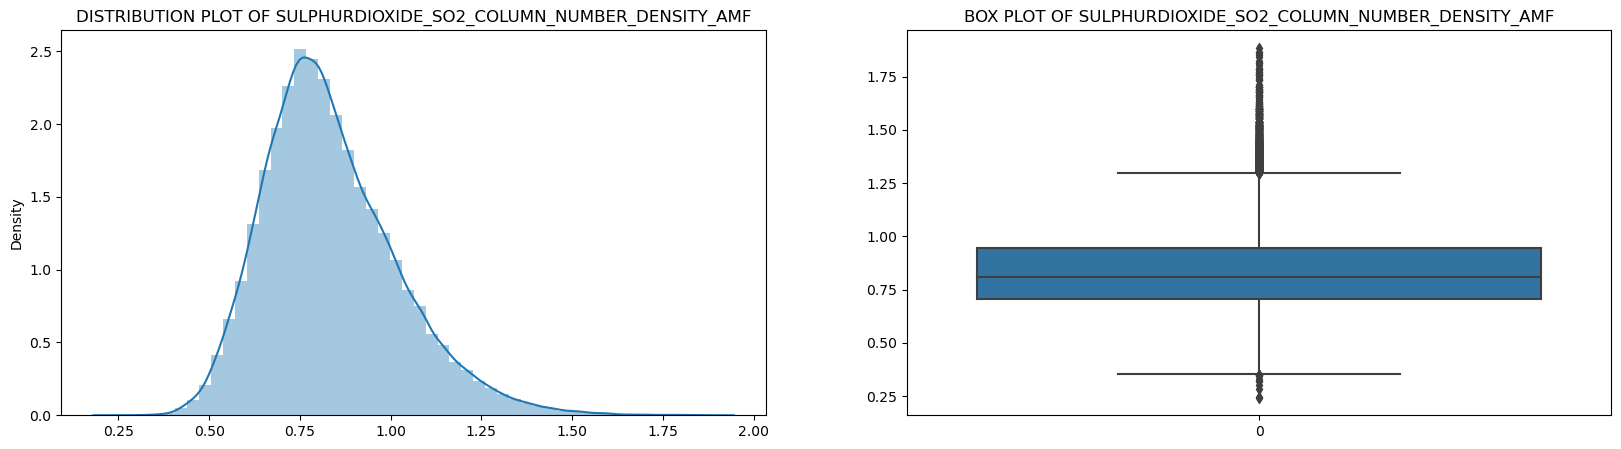

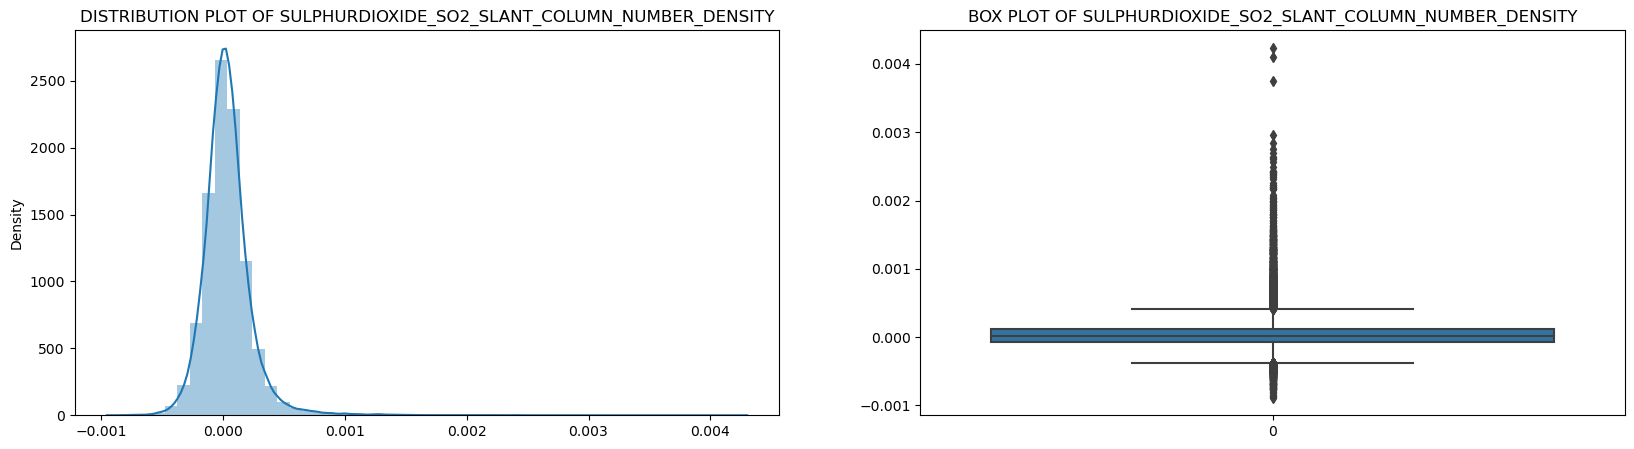

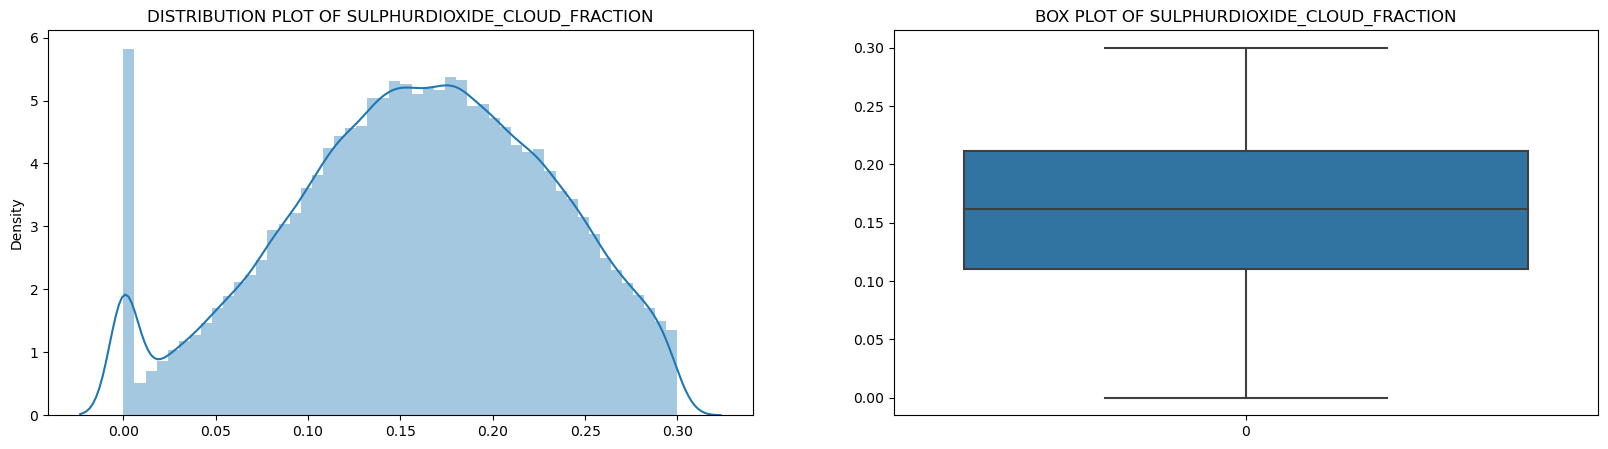

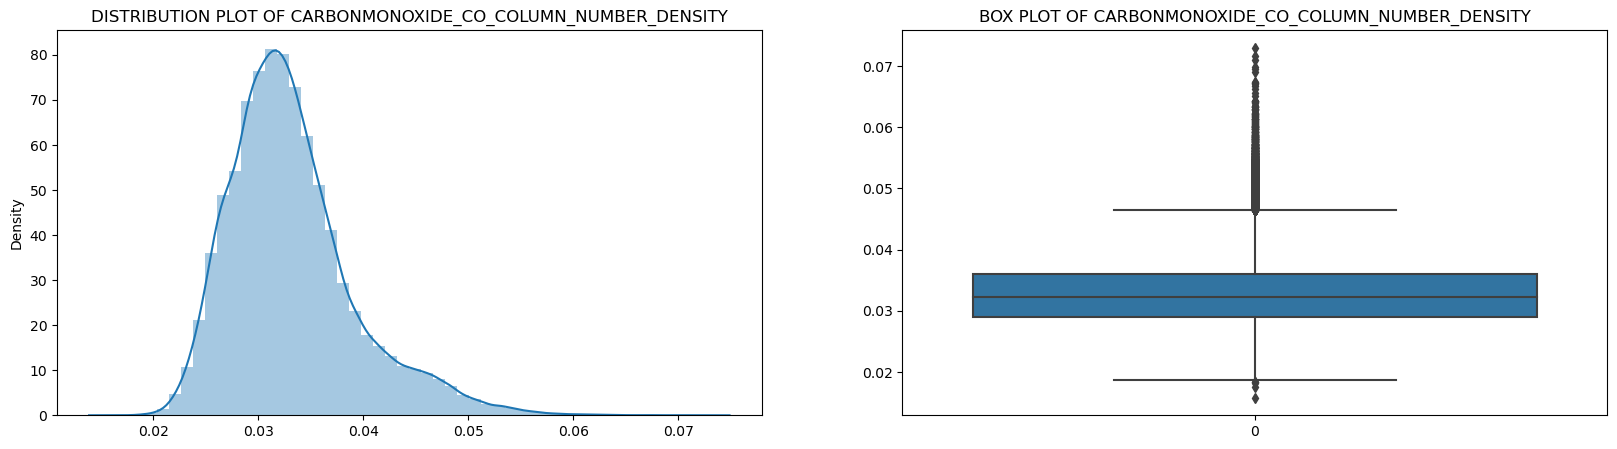

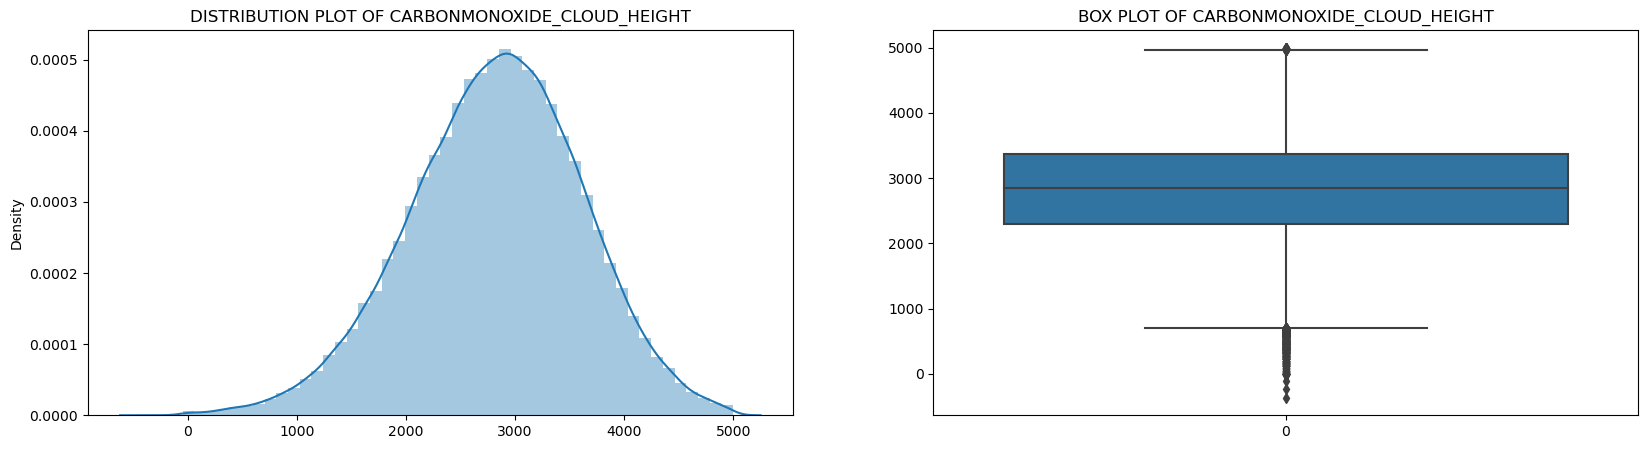

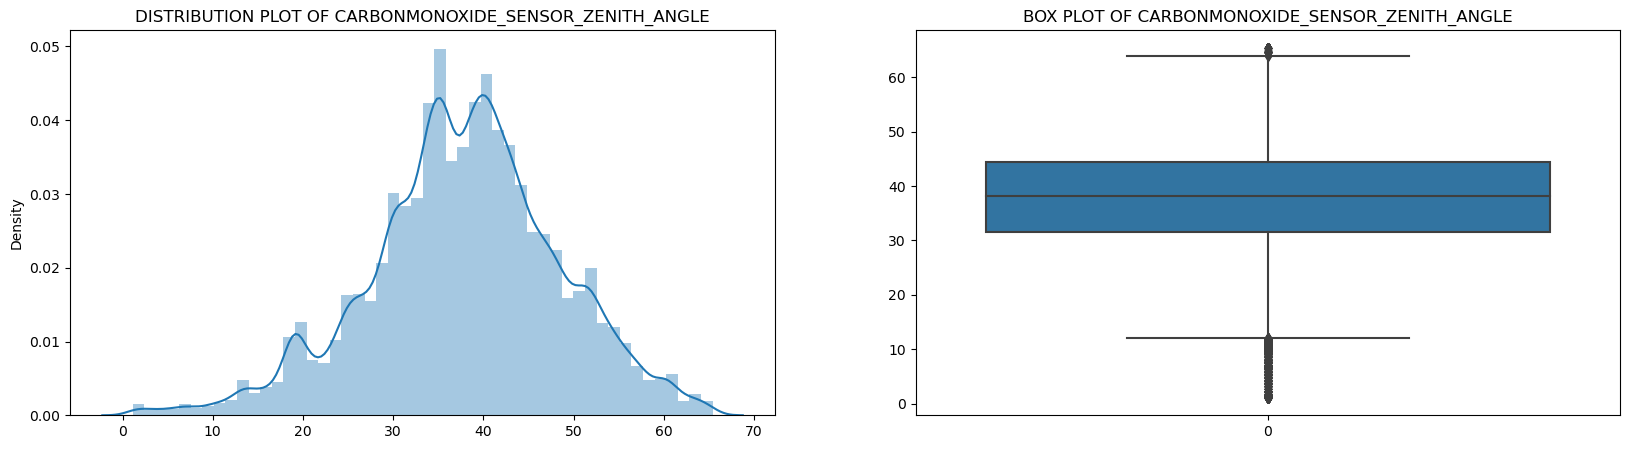

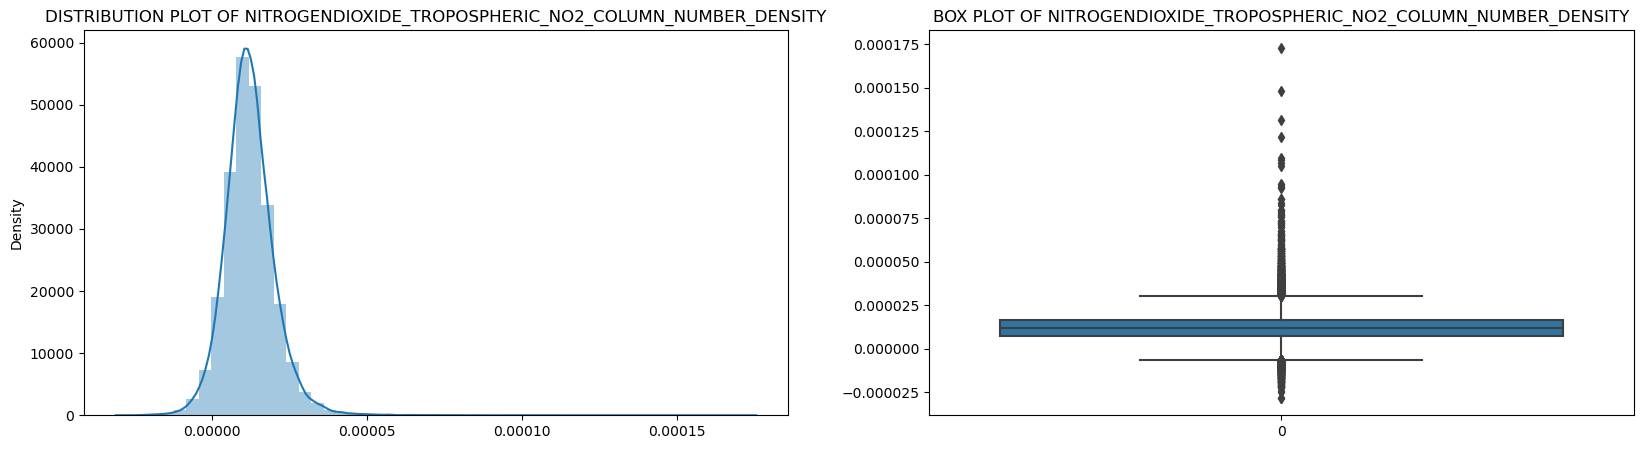

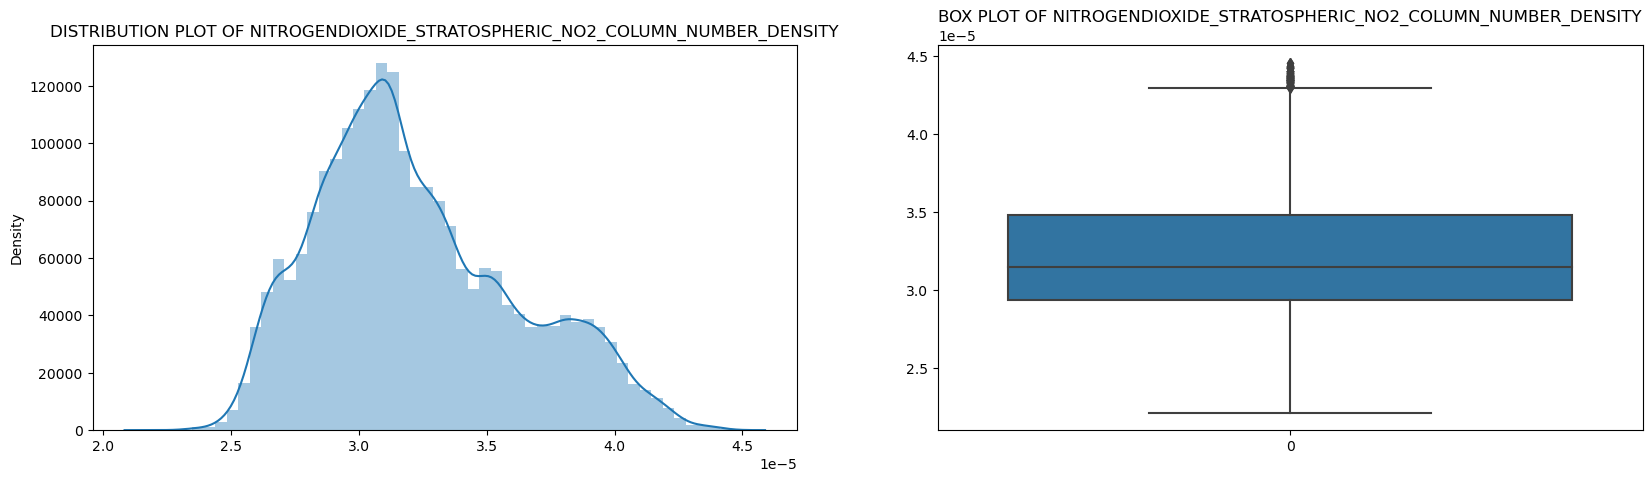

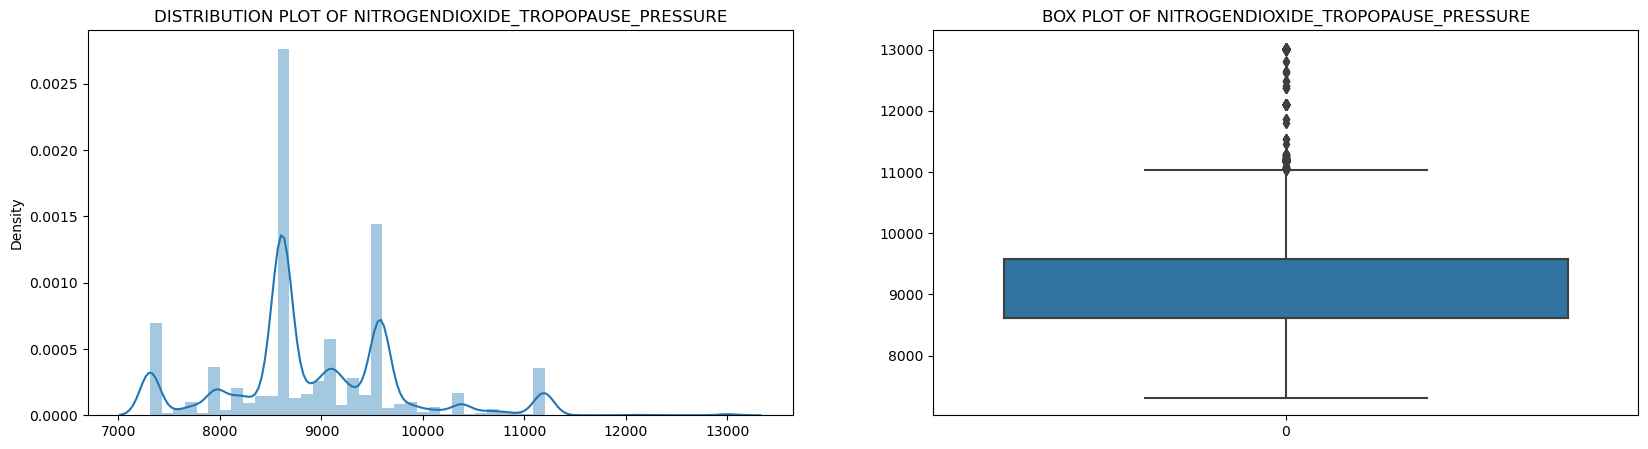

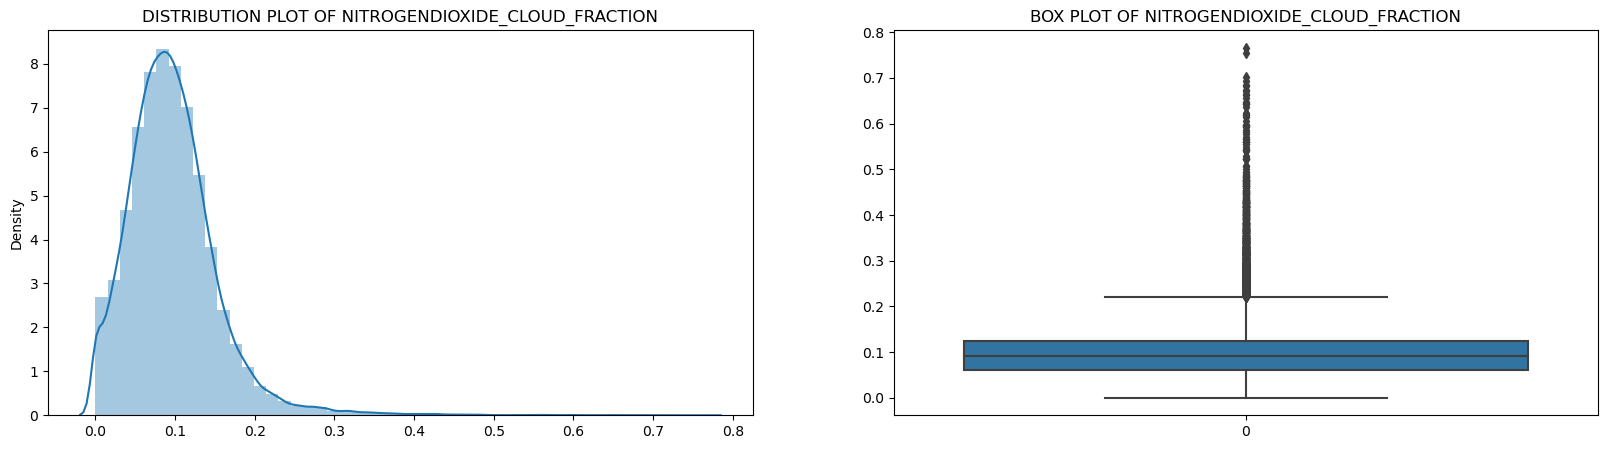

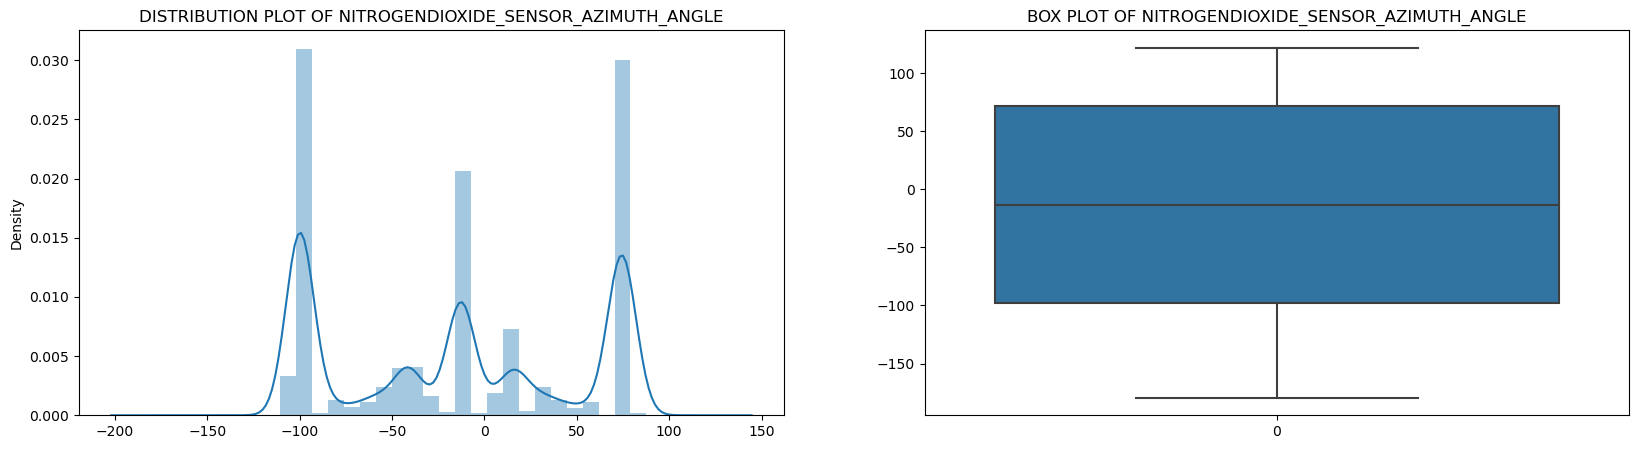

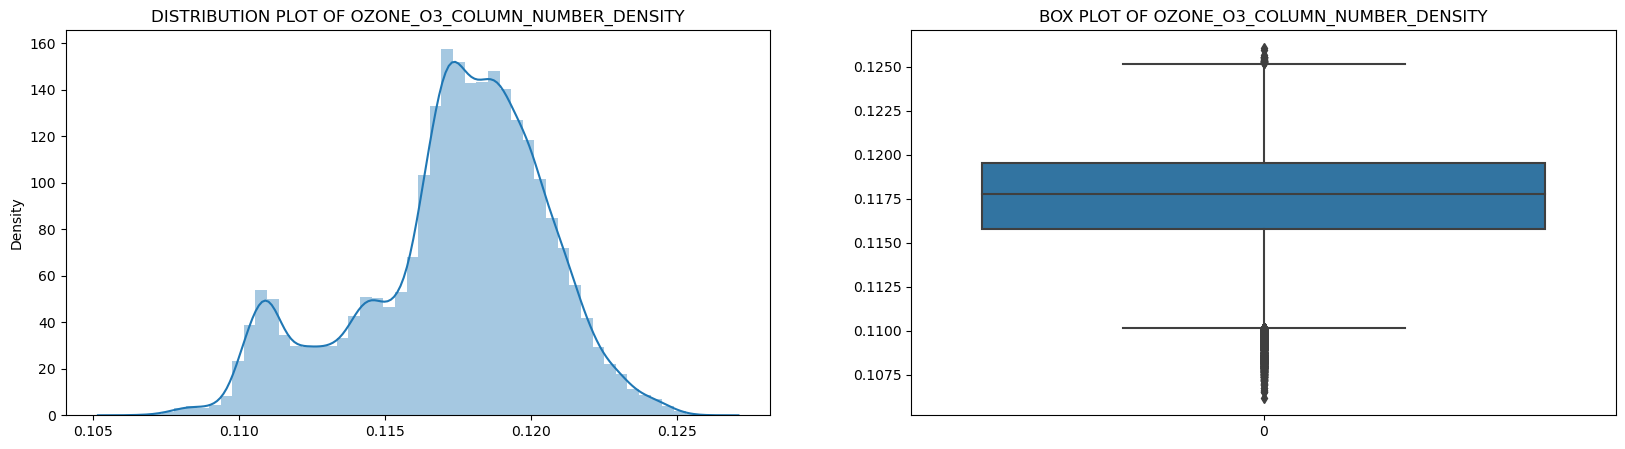

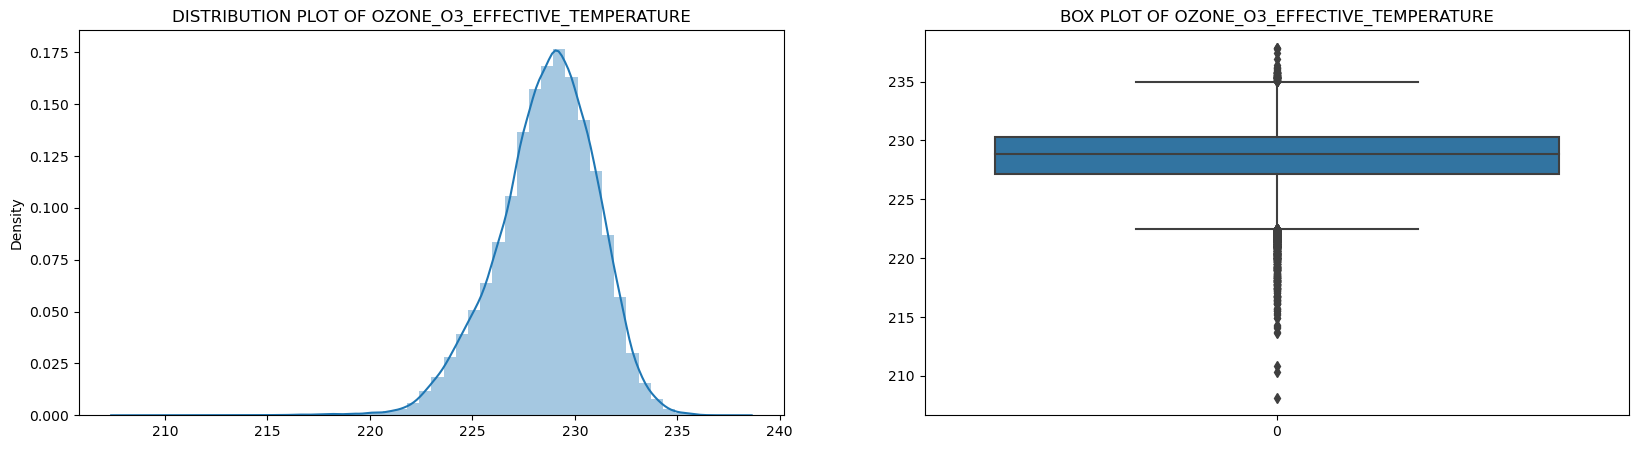

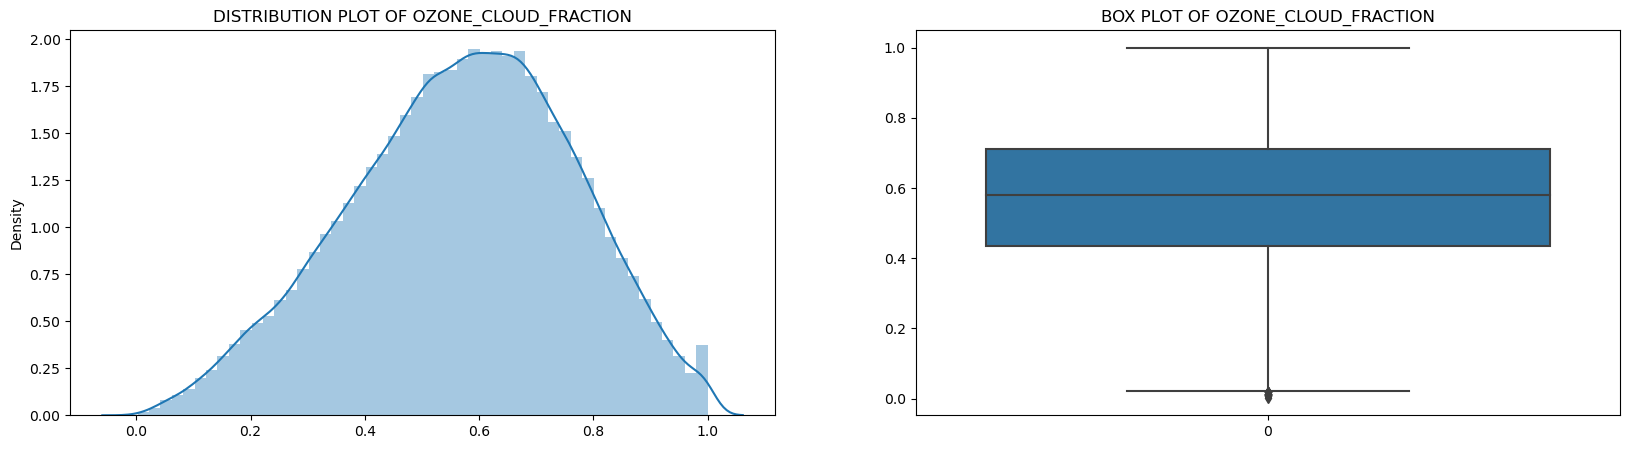

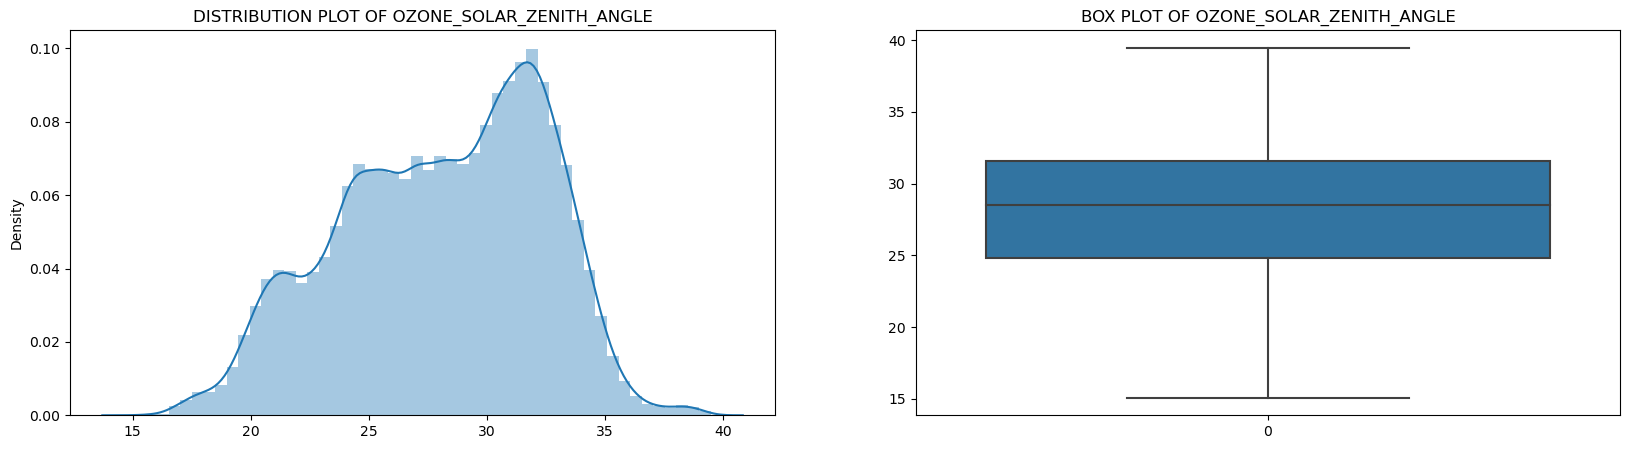

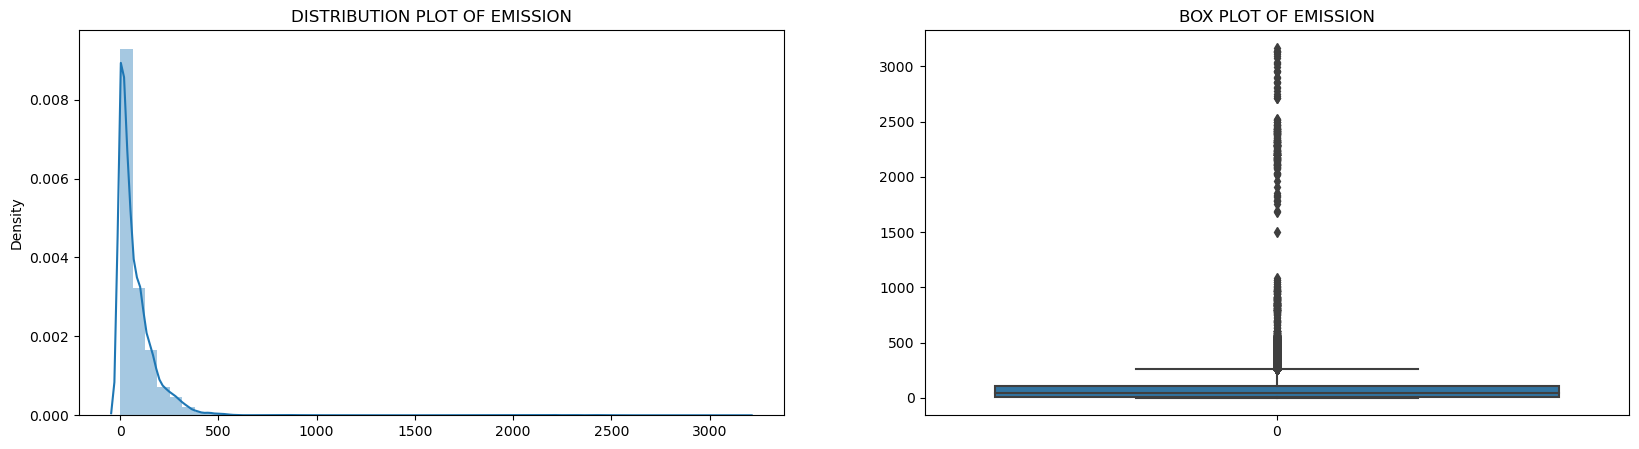

In [18]:
numerical = df.select_dtypes(include = [np.number])
for num in numerical.drop(columns = ['latitude','longitude','year','week_no']).columns:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(f'DISTRIBUTION PLOT OF {num}'.upper())
    sns.distplot(x = df[num]);
    
    plt.subplot(1,2,2)
    plt.title(f'BOX plot of {num}'.upper())
    sns.boxplot(df[num])
    plt.show()

In [19]:
### imputation of missimg values
#since all our columns are higly skewed let us do imputaion using the median value of each column because
#medain is unaffected by outliers
numerical = df.select_dtypes(include=[np.number])
for num in numerical.drop(columns =['emission']).columns:
    median = df[num].median()
    df[num] = df[num].fillna(median)
    
    
    Median = test[num].median()
    test[num] = test[num].fillna(Median)

# LET US HANDLE THE OUTLIERS IN EACH COLUMNS

In [20]:
# let us deal with the outliers 
def cap_outlier (x, col_name, ll, ul):
    if x < ll:
        return ll
    elif x > ul:
        return ul
    else :
        return x
    return 0
for col_name in numerical.drop(columns=['emission']).columns:
    q1 = np.percentile(df[col_name], 25)
    q3 = np.percentile(df[col_name], 75)
    iqr = q3 - q1 
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df[col_name] = df[col_name].apply(lambda x : cap_outlier(x, col_name, lower_limit, upper_limit))
    

In [21]:
### test data
# let us deal with the outliers 
#outlier_list = ['energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min']
def cap_outlier (x, col_name, ll, ul):
    if x < ll:
        return ll
    elif x > ul:
        return ul
    else :
        return x
    return 0
for col_name in numerical.drop(columns=['emission']).columns:
    q1 = np.percentile(test[col_name], 25)
    q3 = np.percentile(test[col_name], 75)
    iqr = q3 - q1 
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    test[col_name] = test[col_name].apply(lambda x : cap_outlier(x, col_name, lower_limit, upper_limit))
    

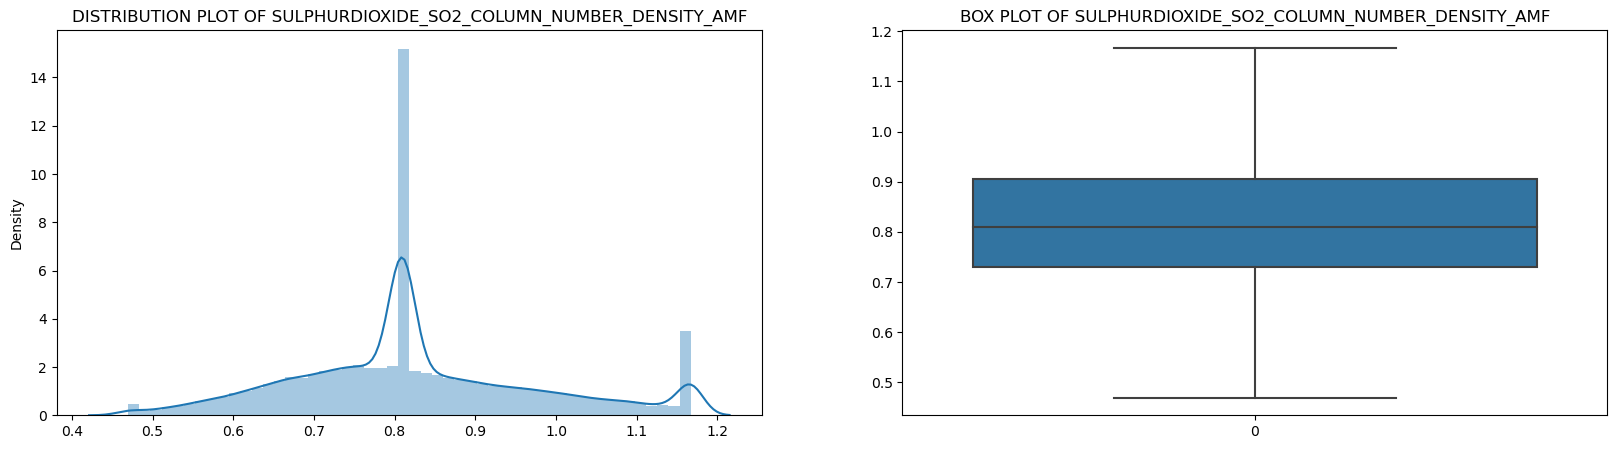

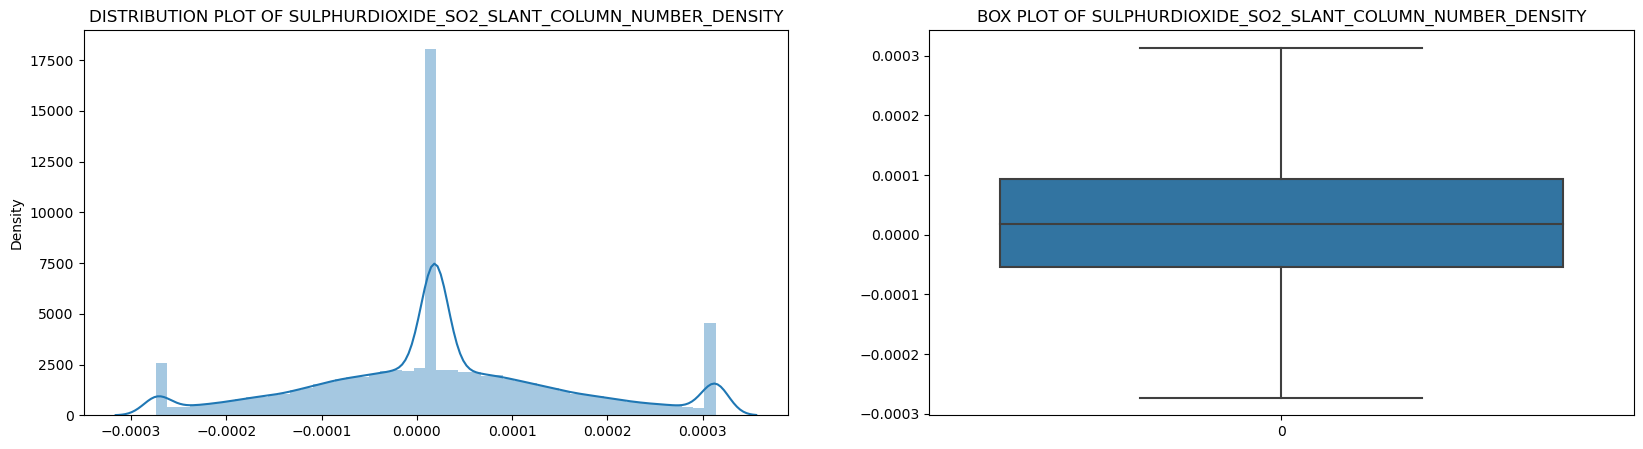

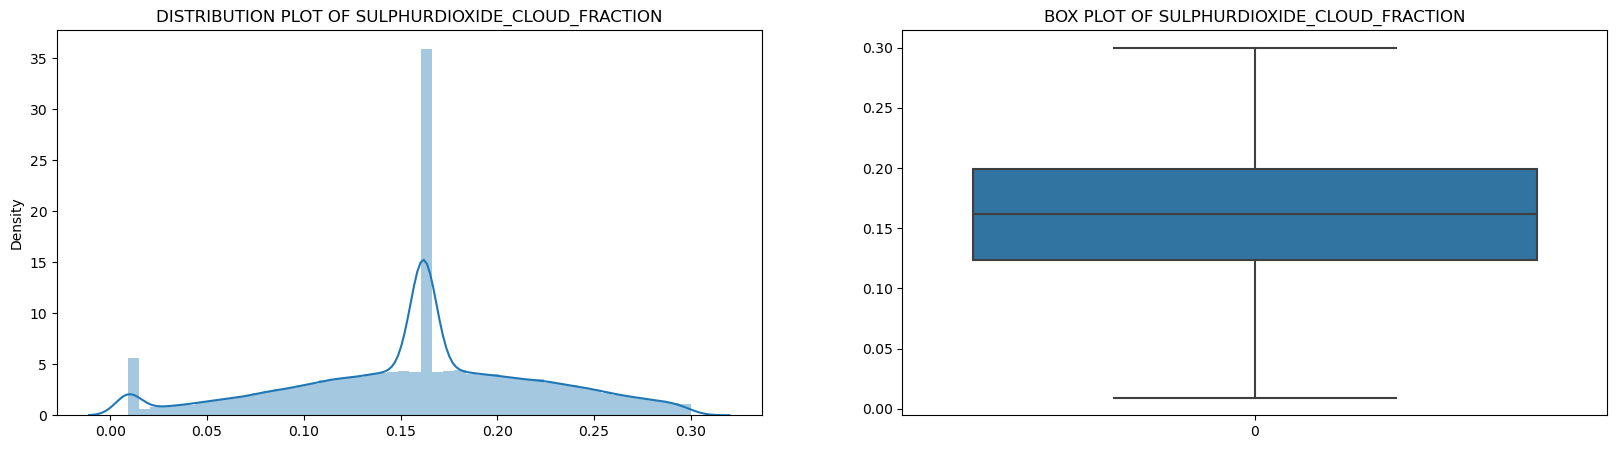

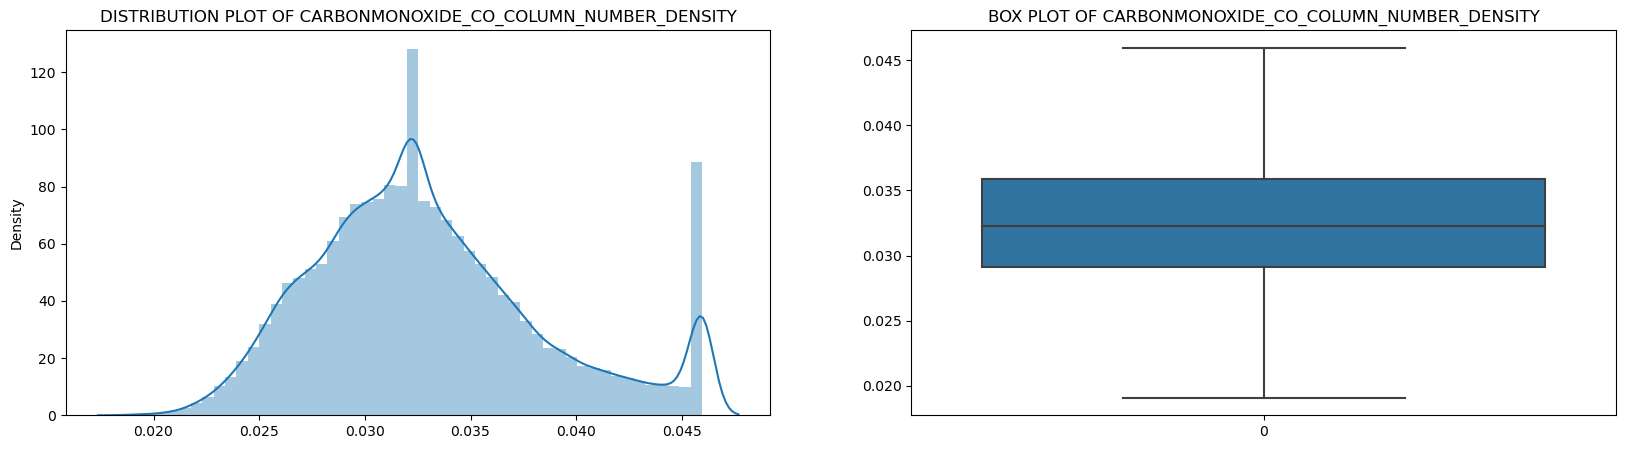

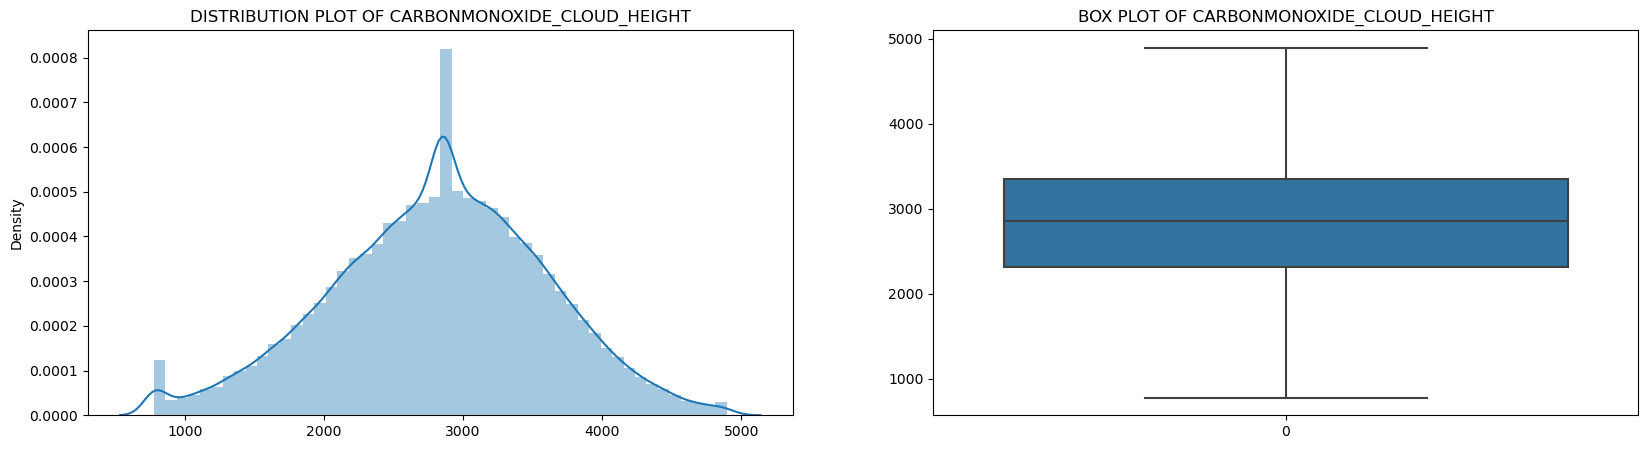

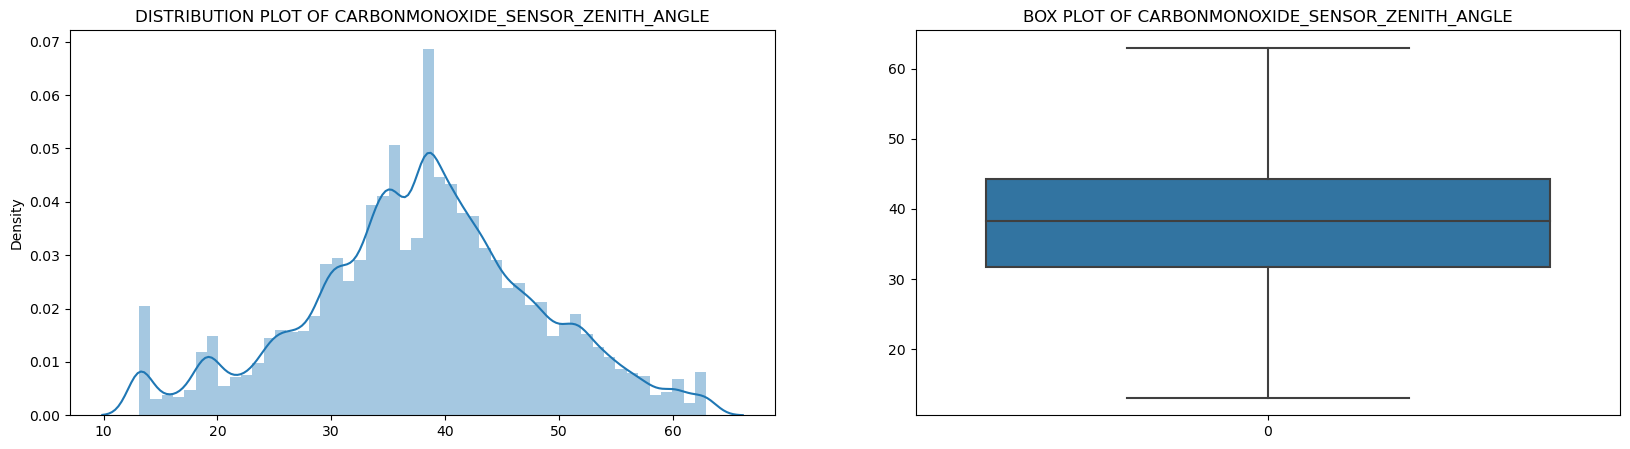

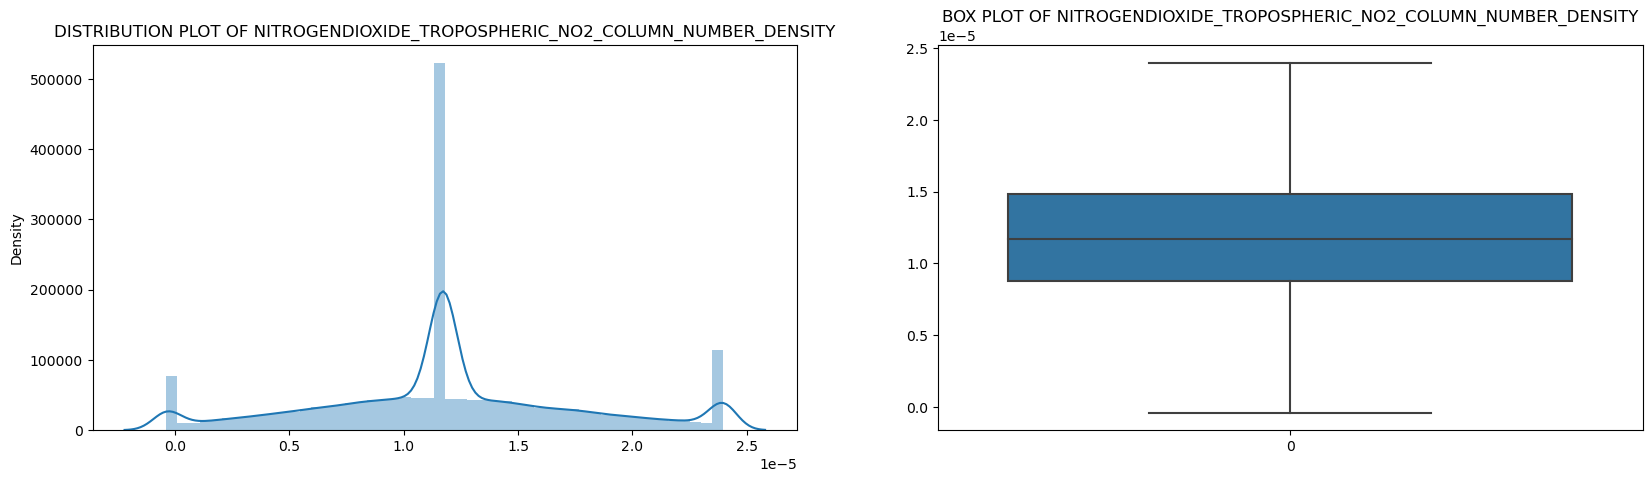

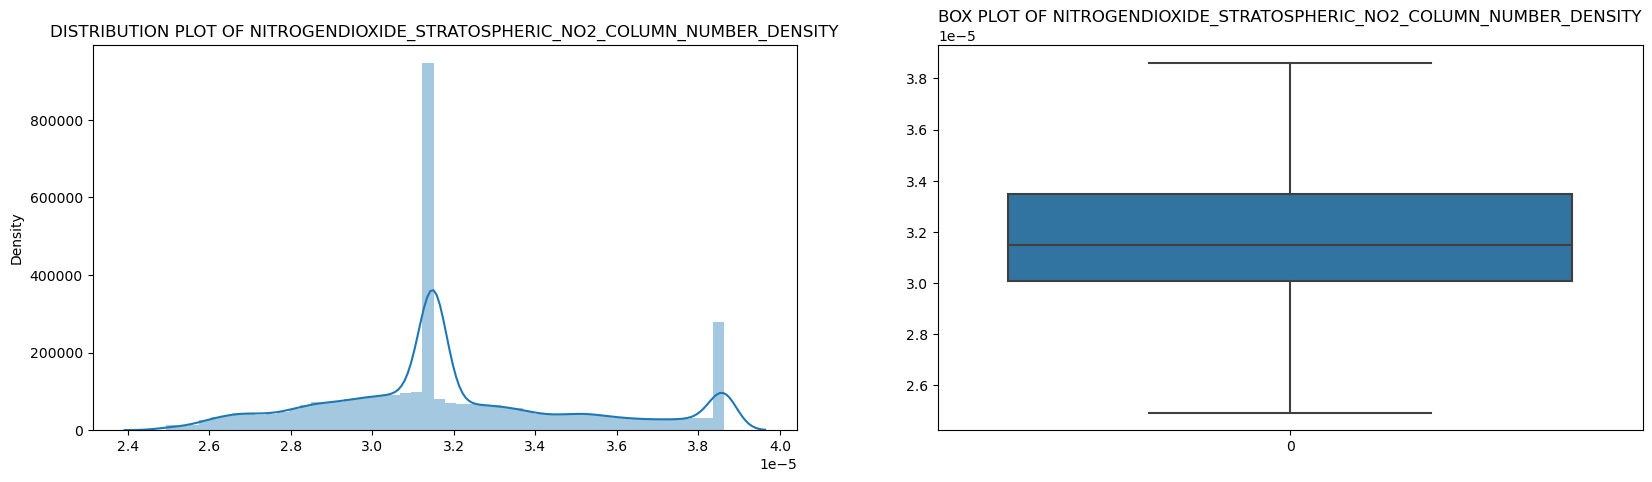

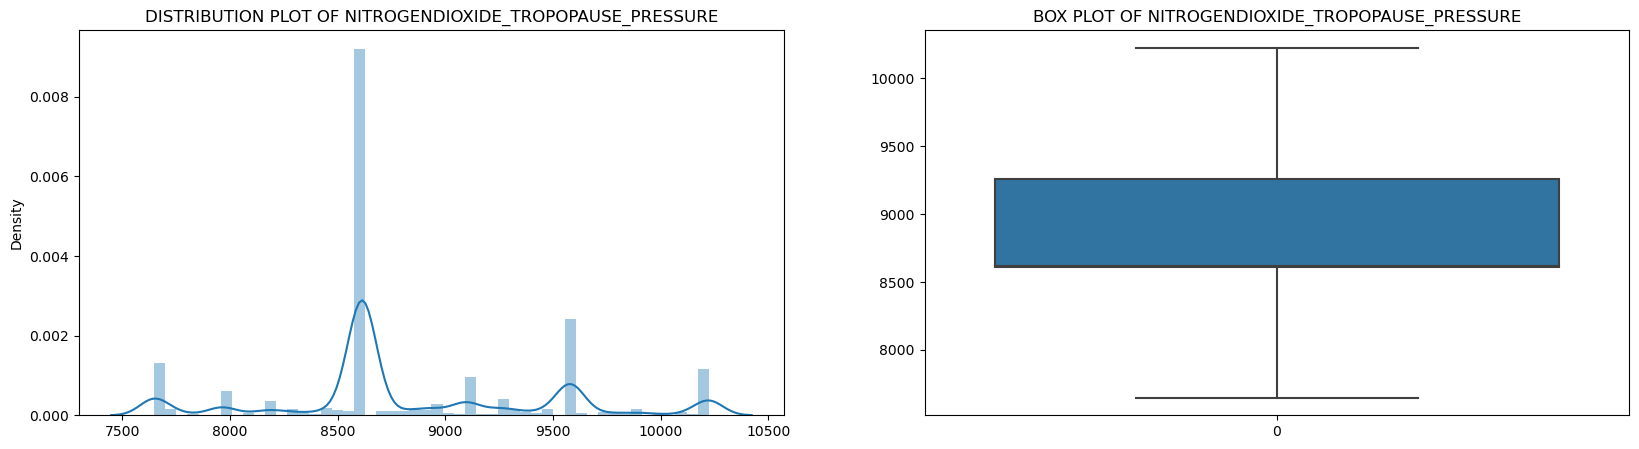

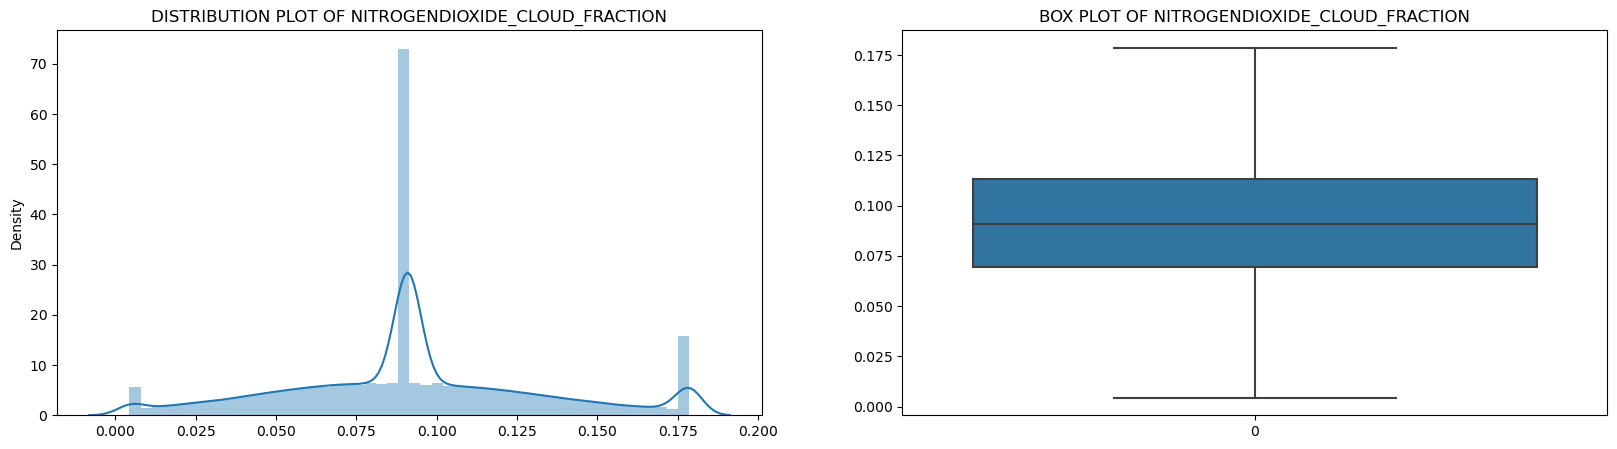

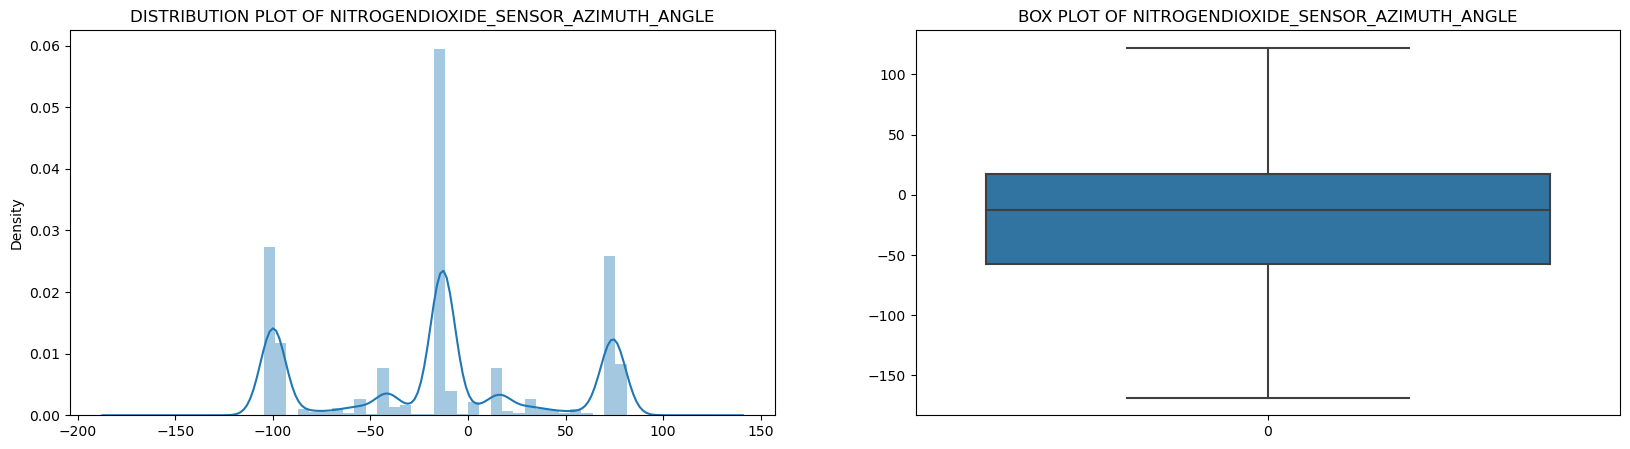

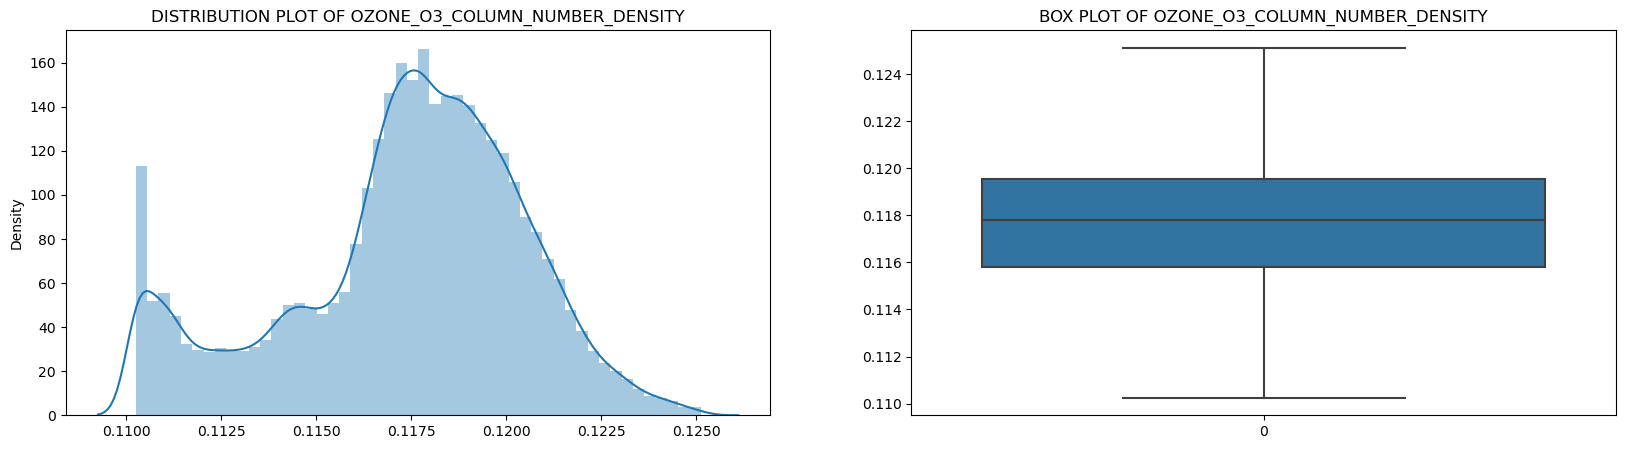

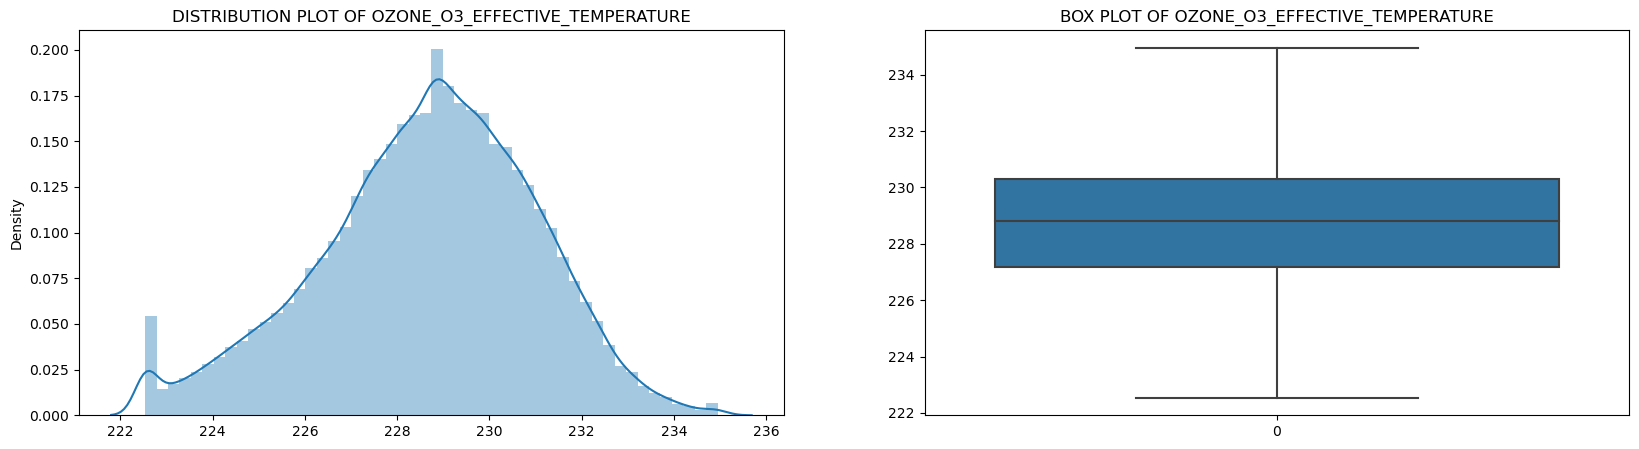

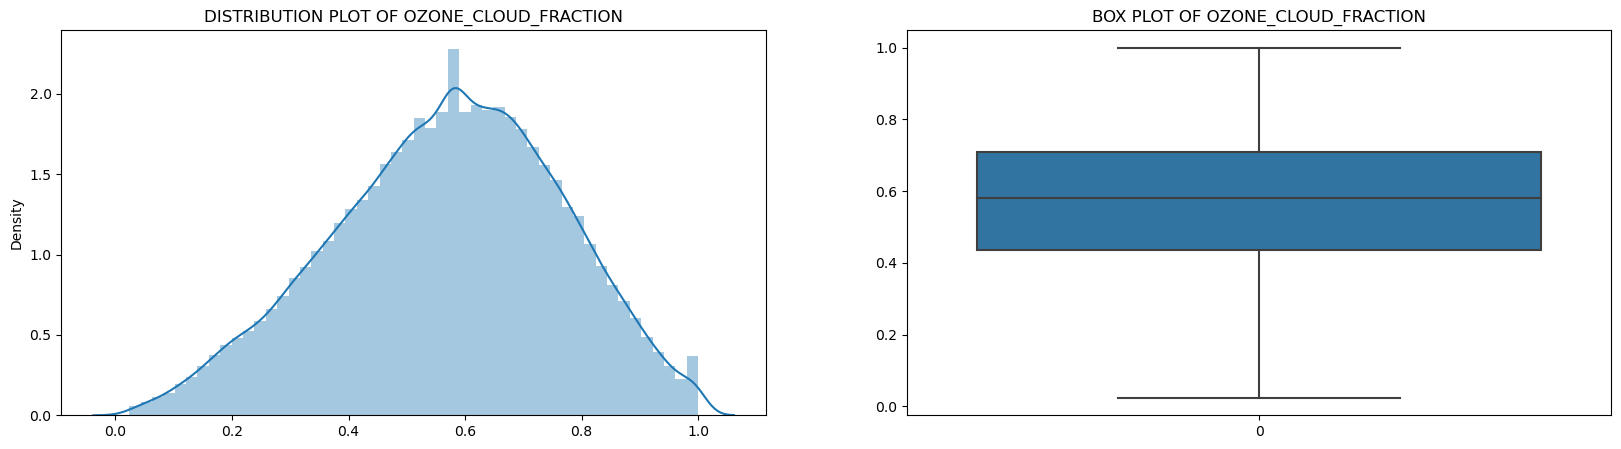

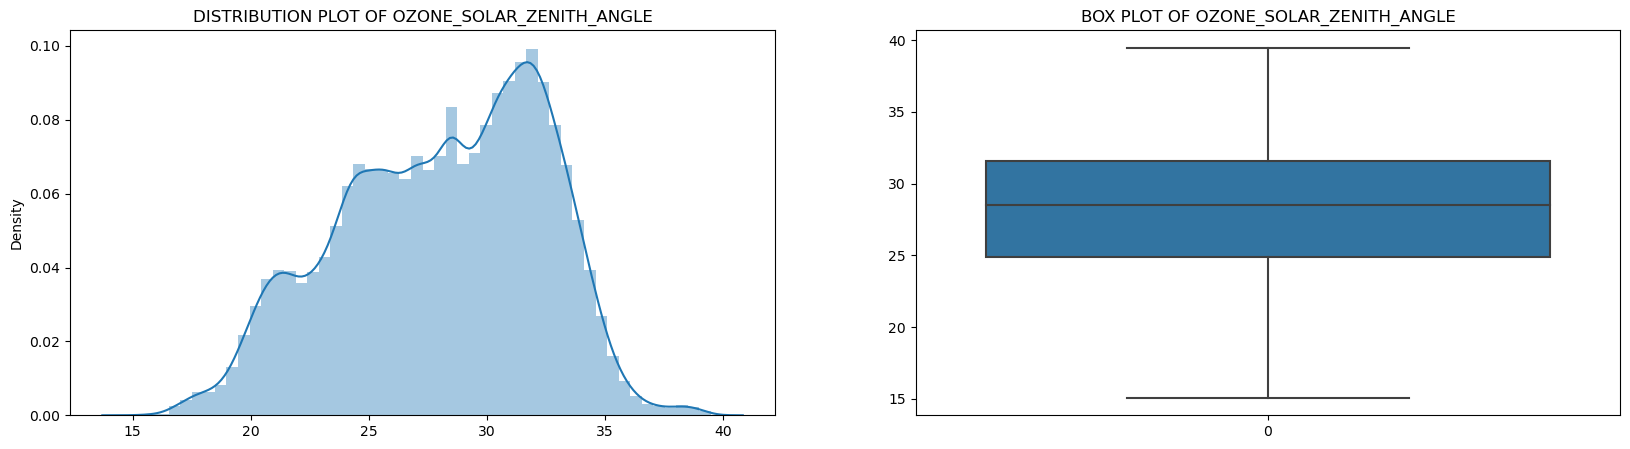

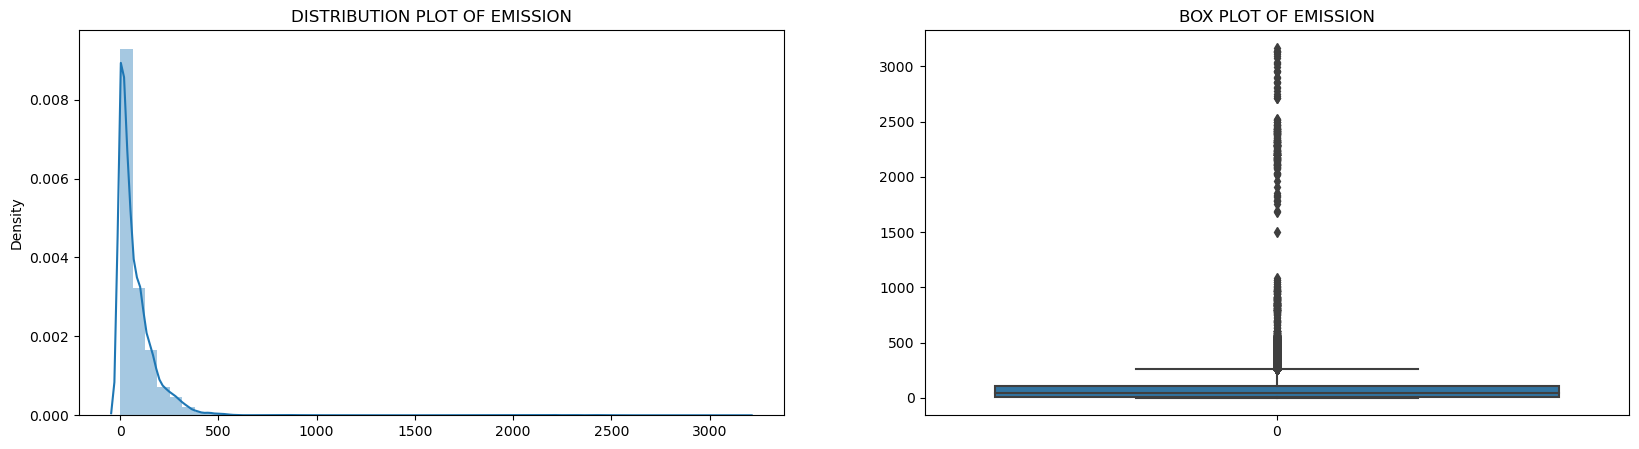

In [22]:
numerical = df.select_dtypes(include = [np.number])
for num in numerical.drop(columns = ['latitude','longitude','year','week_no']).columns:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(f'DISTRIBUTION PLOT OF {num}'.upper())
    sns.distplot(x = df[num]);
    
    plt.subplot(1,2,2)
    plt.title(f'BOX plot of {num}'.upper())
    sns.boxplot(df[num])
    plt.show()

In [23]:
### ALL THE OUTLIERS HAVE BEEN HANDLED

# FEATURE ENGINEERING

In [24]:
##LET US CREATE A COLUMN CALLED LOCATION BY BRINGIN TOGETHER LATITUDE AND LONGITUDE
for name in [df, test]:
    name['location'] = name['latitude'].astype(str) + '_' + name['longitude'].astype(str)  
    
    
#### LET US CREATE A COLUMN THAT SHOW THE DATE RECORED WAS DONE  AND CREATE A COLUMN THAT REALTE TO THE MONTH IN WHICH THE SATELLITE COLLETED THE DATA   

def extract_date_from_year_and_week(year, week):
    return pd.to_datetime(year, format="%Y") + pd.to_timedelta(week.mul(7), unit="days")


df["Date"] = extract_date_from_year_and_week(df.year, df.week_no)
test["Date"] = extract_date_from_year_and_week(test.year, test.week_no)

df["Month"] = df.Date.dt.month
test["Month"] = test.Date.dt.month

In [25]:
####Statiscal description of each column
df.describe().T

count         mean  \
latitude                                            79023.0    -1.891072   
longitude                                           79023.0    29.880155   
year                                                79023.0  2020.000000   
week_no                                             79023.0    26.000000   
SulphurDioxide_SO2_column_number_density_amf        79023.0     0.825013   
SulphurDioxide_SO2_slant_column_number_density      79023.0     0.000023   
SulphurDioxide_cloud_fraction                       79023.0     0.159307   
CarbonMonoxide_CO_column_number_density             79023.0     0.032971   
CarbonMonoxide_cloud_height                         79023.0  2824.728578   
CarbonMonoxide_sensor_zenith_angle                  79023.0    37.929864   
NitrogenDioxide_tropospheric_NO2_column_number_...  79023.0     0.000012   
NitrogenDioxide_stratospheric_NO2_column_number...  79023.0     0.000032   
NitrogenDioxide_tropopause_pressure                 79023.0  8827.829497   
NitrogenDioxide_cloud_fraction                      79023.0     0.092682   
NitrogenDioxide_sensor_azimuth_angle                79023.0   -15.261443   
Ozone_O3_column_number_density                      79023.0     0.117362   
Ozone_O3_effective_temperature                      79023.0   228.644253   
Ozone_cloud_fraction                                79023.0     0.569186   
Ozone_solar_zenith_angle                            79023.0    28.107029   
emission                                            79023.0    81.940552   
Month                                               79023.0     6.522013   

                                                           std           min  \
latitude                                              0.694522 -3.299000e+00   
longitude                                             0.810375  2.822800e+01   
year                                                  0.816502  2.019000e+03   
week_no                                              15.297155  0.000000e+00   
SulphurDioxide_SO2_column_number_density_amf          0.152546  4.693075e-01   
SulphurDioxide_SO2_slant_column_number_density        0.000135 -2.734028e-04   
SulphurDioxide_cloud_fraction                         0.063832  9.091709e-03   
CarbonMonoxide_CO_column_number_density               0.005473  1.908938e-02   
CarbonMonoxide_cloud_height                         774.679785  7.775334e+02   
CarbonMonoxide_sensor_zenith_angle                   10.205290  1.309422e+01   
NitrogenDioxide_tropospheric_NO2_column_number_...    0.000006 -3.891948e-07   
NitrogenDioxide_stratospheric_NO2_column_number...    0.000003  2.493169e-05   
NitrogenDioxide_tropopause_pressure                 634.872165  7.647508e+03   
NitrogenDioxide_cloud_fraction                        0.039975  4.423001e-03   
NitrogenDioxide_sensor_azimuth_angle                 59.625891 -1.686026e+02   
Ozone_O3_column_number_density                        0.003164  1.102517e-01   
Ozone_O3_effective_temperature                        2.341326  2.225372e+02   
Ozone_cloud_fraction                                  0.195394  2.365630e-02   
Ozone_solar_zenith_angle                              4.295738  1.507285e+01   
emission                                            144.299648  0.000000e+00   
Month                                                 3.499953  1.000000e+00   

                                                            25%          50%  \
latitude                                              -2.451000    -1.882000   
longitude                                             29.262000    29.883000   
year                                                2019.000000  2020.000000   
week_no                                               13.000000    26.000000   
SulphurDioxide_SO2_column_number_density_amf           0.730940     0.809118   
SulphurDioxide_SO2_slant_column_number_density        -0.000053     0.000019   
SulphurDioxide_cloud_fraction                          0.123

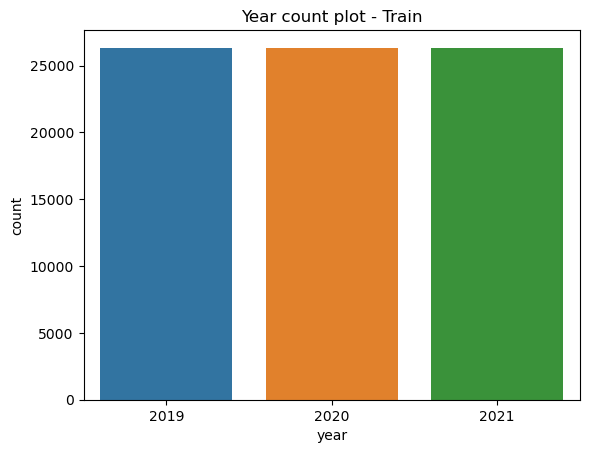

In [26]:
# Year countplot

sns.countplot(x='year', data=df)
plt.title('Year count plot - Train')
plt.show()

In [27]:
##the data were recorded over three years (2019, 2020, 2021)

In [28]:
### let us see the average emission per year as well as the monthly emission  of CO2
yearly_emission = df[['emission', 'year']].groupby(by = 'year').mean()
monthly_emission = df[['emission', 'Month']].groupby(by = 'Month').mean()

In [29]:
yearly_emission

emission
year           
2019  87.255317
2020  75.992122
2021  82.574217

<Axes: xlabel='year'>

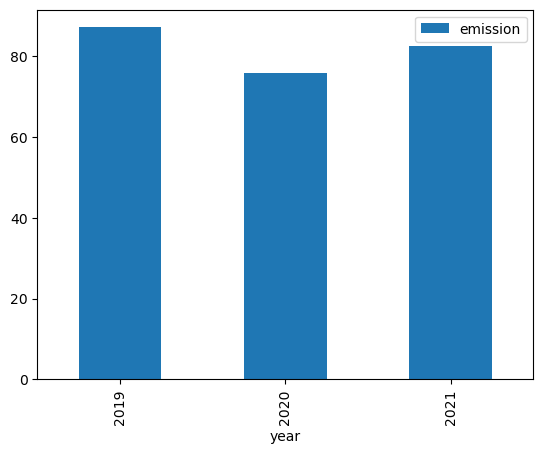

In [30]:
yearly_emission.plot(kind='bar')

In [31]:
#the plots show that the lowest emission was recorded in 2020 this colud be as a result of covid-19
#since during this period there was no proper function of many industies. 
#Also it be seen that in  2021 the emission in increasing.

In [32]:
monthly_emission 

emission
Month            
1       80.848430
2       84.960832
3       77.828870
4       95.427218
5       72.510409
6       72.425800
7       72.402041
8       75.288211
9       79.639707
10     106.452735
11      82.195586
12      79.347426

<Axes: xlabel='Month'>

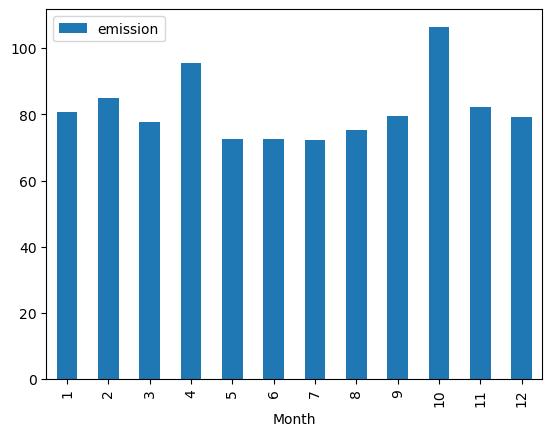

In [33]:
monthly_emission.plot(kind='bar')

In [34]:
#from the monthly emission we can see that highest emission of CO2 were recorded in OCTOBER(106.452735) followed by April(95.427218)


In [35]:
df.emission.describe()

count    79023.000000
mean        81.940552
std        144.299648
min          0.000000
25%          9.797995
50%         45.593445
75%        109.549595
max       3167.768000
Name: emission, dtype: float64

# LET US FIND THE LOCATION BASED ON THE LATITUDE AND LONGITUDE

In [63]:
##LOCATION FUNCTION DEFINE
import geopandas as gpd
#import missingno
import geopy

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

def location_finder():
    location = (df.latitude.astype('str') + ', ' + df.longitude.astype('str')).drop_duplicates().reset_index()
    geolocator = Nominatim(user_agent = 'Danish' , timeout = 10)
    rgeocode = RateLimiter(geolocator.reverse , min_delay_seconds = 1)
    return location[0].apply(rgeocode)
extraction_result = location_finder()

In [64]:
##LOCATION WITH HIGHEST EMISSION OF CO2
loca = df[df['emission']==df['emission'].max()]


get_country = lambda x : x.raw['address']['country']
get_state = lambda x : x.raw['address']['state']
get_full_address = lambda x : x.raw['display_name']

location_high =loca[['latitude','longitude']].reset_index().drop('index' , axis = 1)
location_high['country'] = extraction_result.apply(get_country)
location_high['state'] = extraction_result.apply(get_state)
location_high['full_address'] = extraction_result.apply(get_full_address)
location_high

latitude  longitude                           country      state  \
0    -2.079     29.321  République démocratique du Congo  Nord-Kivu   

                                        full_address  
0  Taliha, Lubero, Nord-Kivu, République démocrat...

In [65]:
##LOCATION WITH EMISSION GREATER OR EQUAL TO 500 DURING 2019
year_2019 =df[ df['year'] == 2019]
location_max_2019 = year_2019[year_2019['emission'] >= 100]
location_max_2019[['latitude', 'longitude']].drop_duplicates()

latitude  longitude
477      -0.569     30.031
997      -0.615     30.885
1113     -0.627     29.773
1758     -0.667     30.433
2081     -0.702     29.798
...         ...        ...
73935    -2.931     29.569
74730    -2.955     30.245
74903    -2.958     29.442
75684    -2.985     30.415
77751    -3.133     29.467

[201 rows x 2 columns]

<Axes: ylabel='country'>

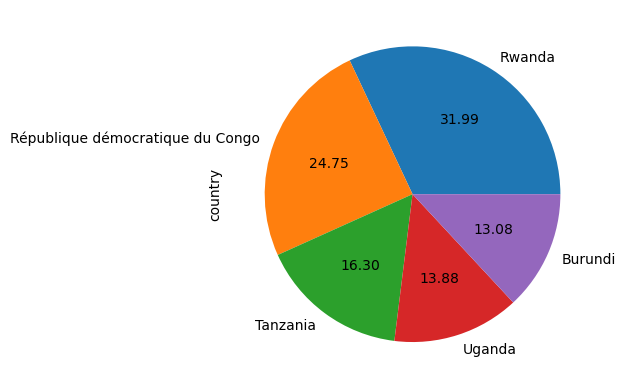

In [66]:
get_country = lambda x : x.raw['address']['country']
get_state = lambda x : x.raw['address']['state']
#get_full_address = lambda x : x.raw['display_name']

location =location_max_2019.reset_index().drop('index' , axis = 1)
location['country'] = extraction_result.apply(get_country)
location['state'] = extraction_result.apply(get_state)
#location['full_address'] = extraction_result.apply(get_full_address)
location['country'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [67]:
##LOCATION WITH EMISSION GREATER OR EQUAL TO 500 DURING 2020
year_2020 =df[ df['year'] == 2020]
location_max_2020 = year_2020[year_2020['emission'] >= 100]
location_max_2020[['latitude', 'longitude']].drop_duplicates()

latitude  longitude
531      -0.569     30.031
1166     -0.627     29.773
1811     -0.667     30.433
2155     -0.702     29.798
2279     -0.720     30.480
2597     -0.727     30.573
3233     -0.793     30.607
4222     -0.837     29.863
4346     -0.843     30.657
4665     -0.855     30.145
6890     -0.956     30.744
7367     -0.964     29.636
9752     -1.041     29.859
10070    -1.045     30.455
10229    -1.048     30.252
10388    -1.052     30.948
10706    -1.065     31.035
11026    -1.067     29.833
11342    -1.068     31.532
12932    -1.115     30.085
13568    -1.129     31.371
14565    -1.168     30.232
15000    -1.173     30.727
15794    -1.187     31.113
15953    -1.196     30.404
16112    -1.200     31.000
16271    -1.203     31.397
16589    -1.211     30.389
16748    -1.214     30.786
17066    -1.223     29.877
17225    -1.225     30.975
17397    -1.226     30.274
17584    -1.231     30.269
17702    -1.231     30.969
18020    -1.244     29.856
18338    -1.258     30.042
18661    -1.274     29.926
18815    -1.279     30.521
19292    -1.289     29.711
19928    -1.307     30.393
20087    -1.315     29.785
20246    -1.319     30.281
20725    -1.331     29.669
21359    -1.342     30.158
21518    -1.342     31.358
21677    -1.346     31.254
21996    -1.355     30.245
22326    -1.360     30.340
22949    -1.371     29.629
23108    -1.383     29.917
23426    -1.398     29.702
23587    -1.399     29.601
23745    -1.400     30.000
24223    -1.412     31.188
24380    -1.413     30.287
24541    -1.416     31.284
24711    -1.427     30.073
24857    -1.429     30.171
25811    -1.486     29.614
25971    -1.490     30.310
26765    -1.510     29.890
26924    -1.510     30.190
27083    -1.514     29.686
27560    -1.526     29.874
27720    -1.528     29.972
28037    -1.529     30.971
28673    -1.533     29.967
28832    -1.534     30.366
29468    -1.581     30.819
29786    -1.593     30.207
30105    -1.597     29.603
30741    -1.615     30.285
30899    -1.617     30.683
31058    -1.621     30.479
31217    -1.639     31.061
31376    -1.641     31.259
31535    -1.649     29.351
31694    -1.659     29.641
31866    -1.664     30.336
32012    -1.667     30.933
32330    -1.683     29.617
33602    -1.718     30.382
33761    -1.729     30.471
34092    -1.737     30.063
34238    -1.743     29.457
34715    -1.770     29.130
35670    -1.802     29.798
35987    -1.804     31.196
36146    -1.807     30.093
36305    -1.808     29.892
37113    -1.844     30.356
37418    -1.846     29.554
37736    -1.847     30.953
38055    -1.852     29.948
38531    -1.868     29.832
38690    -1.871     29.729
39485    -1.882     30.018
39644    -1.889     29.611
39962    -1.900     29.500
40452    -1.906     29.694
40611    -1.911     29.389
40757    -1.911     30.189
40916    -1.920     29.680
41235    -1.923     29.777
41883    -1.933     30.367
42347    -1.945     29.155
42665    -1.959     30.341
43460    -1.978     31.122
43779    -1.990     30.410
43937    -2.015     30.985
44586    -2.041     30.559
44891    -2.049     29.551
45063    -2.049     30.751
45209    -2.051     29.949
45368    -2.053     30.647
45686    -2.056     30.544
46176    -2.065     30.235
46640    -2.079     29.321
47289    -2.091     30.709
47607    -2.102     29.898
47754    -2.119     29.281
48230    -2.125     30.375
48390    -2.133     30.467
48548    -2.136     30.264
48707    -2.153     29.947
48866    -2.154     29.946
49025    -2.162     30.138
49502    -2.176     29.324
49674    -2.177     30.223
49992    -2.179     30.621
50138    -2.180     29.620
50456    -2.185     29.515
50628    -2.185     30.515
50775    -2.194     29.506
51582    -2.254     30.446
52059    -2.257     30.243
52218    -2.260     30.840
52536    -2.267     29.933
52682    -2.269     30.231
52841    -2.271     29.929
53013    -2.272     29.128
53172    -2.278     29.722
53318    -2.280     29.920
53649    -2.291     29.609
53795    -2.293     29.507
53954    -2.300     29.200
54113    -2.301     29.899
54272    -2

<Axes: ylabel='country'>

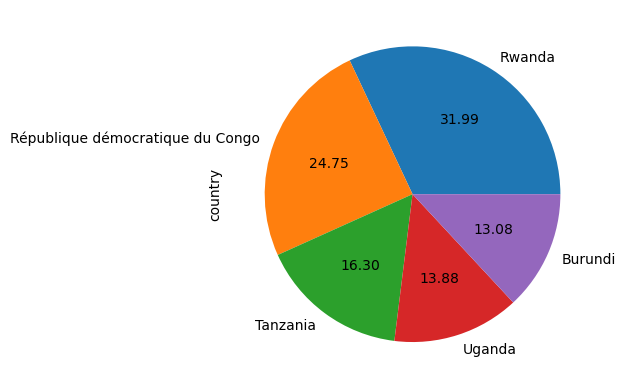

In [68]:
get_country = lambda x : x.raw['address']['country']
get_state = lambda x : x.raw['address']['state']
#get_full_address = lambda x : x.raw['display_name']

location1 =location_max_2020.reset_index().drop('index' , axis = 1)
location1['country'] = extraction_result.apply(get_country)
location1['state'] = extraction_result.apply(get_state)
#location['full_address'] = extraction_result.apply(get_full_address)
location1['country'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [69]:
##LOCATION WITH EMISSION GREATER OR EQUAL TO 500 DURING 2021
year_2021 =df[ df['year'] == 2021]
location_max_2021 = year_2021[year_2021['emission'] >= 100]
location_max_2021[['latitude', 'longitude']].drop_duplicates()

latitude  longitude
584      -0.569     30.031
1220     -0.627     29.773
1865     -0.667     30.433
2187     -0.702     29.798
2332     -0.720     30.480
2651     -0.727     30.573
3286     -0.793     30.607
4254     -0.837     29.863
4400     -0.843     30.657
4718     -0.855     30.145
6943     -0.956     30.744
7421     -0.964     29.636
9805     -1.041     29.859
10123    -1.045     30.455
10282    -1.048     30.252
10441    -1.052     30.948
10759    -1.065     31.035
11081    -1.067     29.833
11395    -1.068     31.532
12985    -1.115     30.085
13621    -1.129     31.371
14589    -1.168     30.232
15096    -1.173     30.727
15847    -1.187     31.113
16007    -1.196     30.404
16165    -1.200     31.000
16324    -1.203     31.397
16643    -1.211     30.389
16801    -1.214     30.786
17119    -1.223     29.877
17278    -1.225     30.975
17451    -1.226     30.274
17610    -1.231     30.269
17789    -1.231     30.969
18073    -1.244     29.856
18391    -1.258     30.042
18714    -1.274     29.926
18868    -1.279     30.521
19345    -1.289     29.711
19982    -1.307     30.393
20140    -1.315     29.785
20299    -1.319     30.281
20781    -1.331     29.669
21416    -1.342     30.158
21571    -1.342     31.358
21730    -1.346     31.254
22053    -1.355     30.245
22380    -1.360     30.340
23002    -1.371     29.629
23161    -1.383     29.917
23479    -1.398     29.702
23649    -1.399     29.601
23802    -1.400     30.000
24276    -1.412     31.188
24434    -1.413     30.287
24640    -1.416     31.284
24765    -1.427     30.073
24912    -1.429     30.171
25864    -1.486     29.614
26028    -1.490     30.310
26818    -1.510     29.890
26977    -1.510     30.190
27136    -1.514     29.686
27614    -1.526     29.874
27774    -1.528     29.972
28090    -1.529     30.971
28726    -1.533     29.967
28886    -1.534     30.366
29522    -1.581     30.819
29839    -1.593     30.207
30162    -1.597     29.603
30330    -1.606     30.294
30794    -1.615     30.285
30952    -1.617     30.683
31111    -1.621     30.479
31270    -1.639     31.061
31429    -1.641     31.259
31588    -1.649     29.351
31747    -1.659     29.641
31920    -1.664     30.336
32065    -1.667     30.933
32383    -1.683     29.617
33655    -1.718     30.382
33814    -1.729     30.471
34146    -1.737     30.063
34291    -1.743     29.457
34769    -1.770     29.130
35727    -1.802     29.798
36040    -1.804     31.196
36200    -1.807     30.093
36363    -1.808     29.892
37167    -1.844     30.356
37472    -1.846     29.554
37789    -1.847     30.953
38121    -1.852     29.948
38584    -1.868     29.832
38743    -1.871     29.729
39542    -1.882     30.018
39697    -1.889     29.611
40015    -1.900     29.500
40506    -1.906     29.694
40665    -1.911     29.389
40810    -1.911     30.189
40974    -1.920     29.680
41288    -1.923     29.777
41937    -1.933     30.367
42400    -1.945     29.155
42718    -1.959     30.341
43513    -1.978     31.122
43836    -1.990     30.410
43990    -2.015     30.985
44640    -2.041     30.559
44948    -2.049     29.551
45117    -2.049     30.751
45276    -2.051     29.949
45421    -2.053     30.647
45740    -2.056     30.544
46230    -2.065     30.235
46693    -2.079     29.321
47343    -2.091     30.709
47661    -2.102     29.898
47820    -2.119     29.281
48297    -2.125     30.375
48452    -2.133     30.467
48606    -2.136     30.264
48761    -2.153     29.947
48919    -2.154     29.946
49083    -2.162     30.138
49555    -2.176     29.324
49728    -2.177     30.223
50046    -2.179     30.621
50192    -2.180     29.620
50509    -2.185     29.515
50682    -2.185     30.515
50841    -2.194     29.506
51636    -2.254     30.446
52113    -2.257     30.243
52272    -2.260     30.840
52590    -2.267     29.933
52736    -2.269     30.231
52894    -2.271     29.929
53067    -2.272     29.128
53226    -2.278     29.722
53376    -2.280     29.920
53703    -2.291     29.609
53848    -2.293     29.507
54007    -2.300     29.200
54166    -2

<Axes: ylabel='country'>

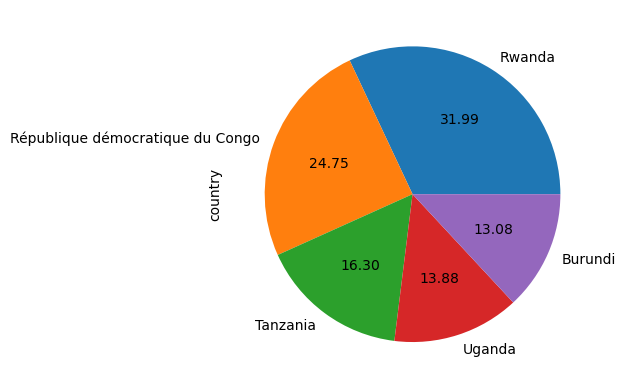

In [70]:
get_country = lambda x : x.raw['address']['country']
get_state = lambda x : x.raw['address']['state']
#get_full_address = lambda x : x.raw['display_name']

location2 =location_max_2021.reset_index().drop('index' , axis = 1)
location2['country'] = extraction_result.apply(get_country)
location2['state'] = extraction_result.apply(get_state)
#location['full_address'] = extraction_result.apply(get_full_address)
location2['country'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [71]:
#From the satitical analysis we can see that mean emission of CO2 is around 82
#Also with a mean of 0 emission this seems very abnormal and may be due to error that occur the the data collection
#the diffenece between  the 75 percentille and the maximum value of emission is vry high hence it can be deduce that the the
#target columns is positively skewed.

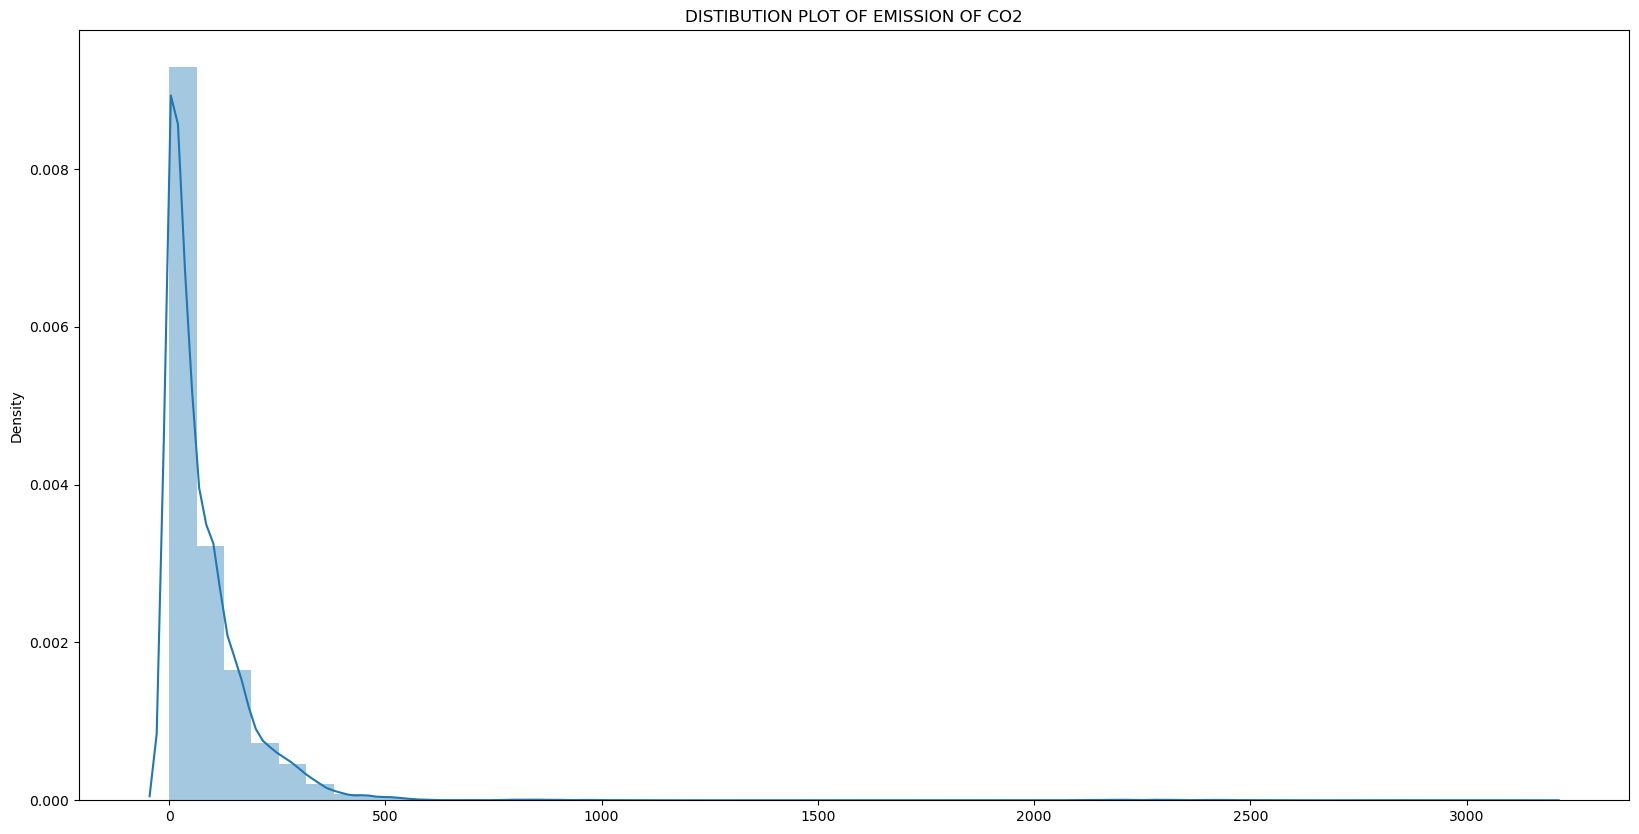

In [36]:
plt.figure(figsize=(20,10))
plt.title(f'DISTIBUTION PLOT OF emission of CO2'.upper())
sns.distplot(x = df['emission'])
plt.show()

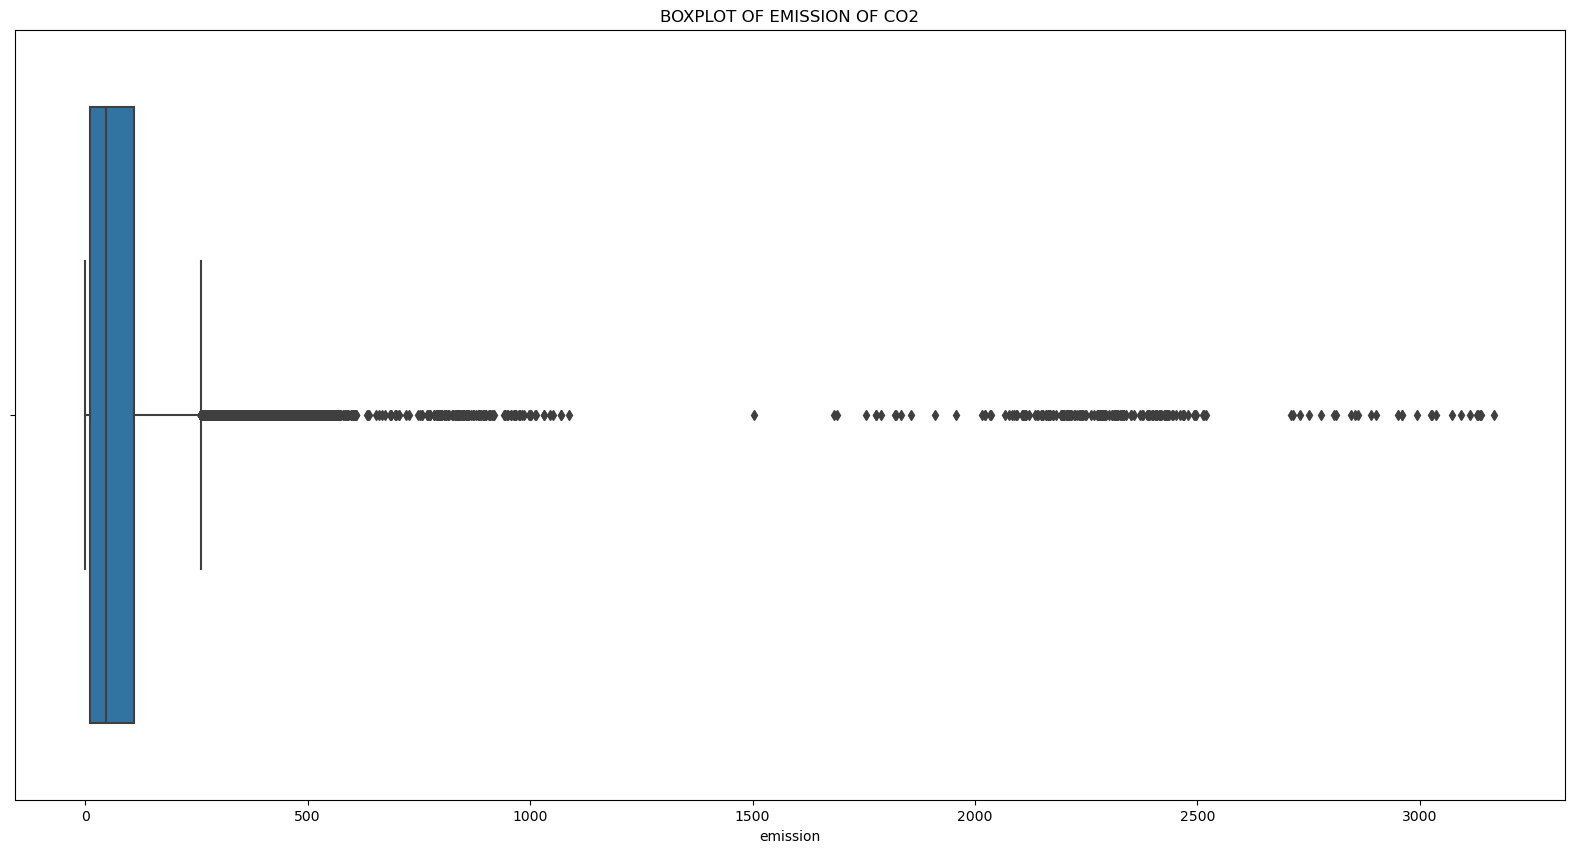

In [37]:
plt.figure(figsize=(20,10))
plt.title(f'BOXPLOT OF emission of CO2'.upper())
sns.boxplot(x = df['emission'])
plt.show()

In [38]:
## Let us address this skewness and the presence of outliers in the target column (emission of CO2)
## We will be using logarthimic approach from Numpy libary

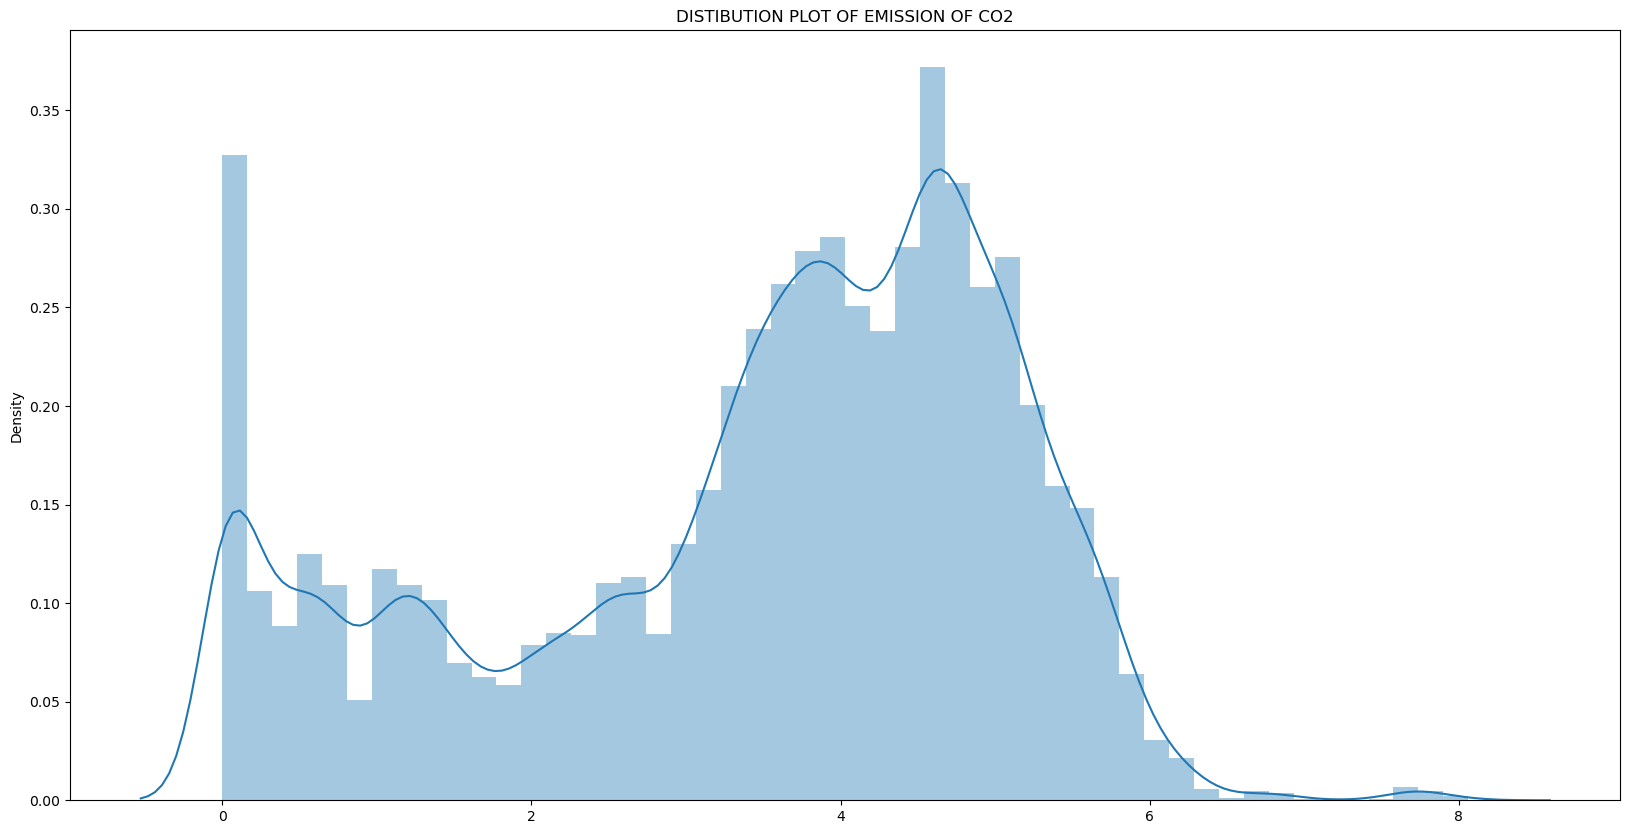

In [39]:
plt.figure(figsize=(20,10))
plt.title(f'DISTIBUTION PLOT OF emission of CO2'.upper())
sns.distplot(x = np.log(1 + df['emission']))
plt.show()

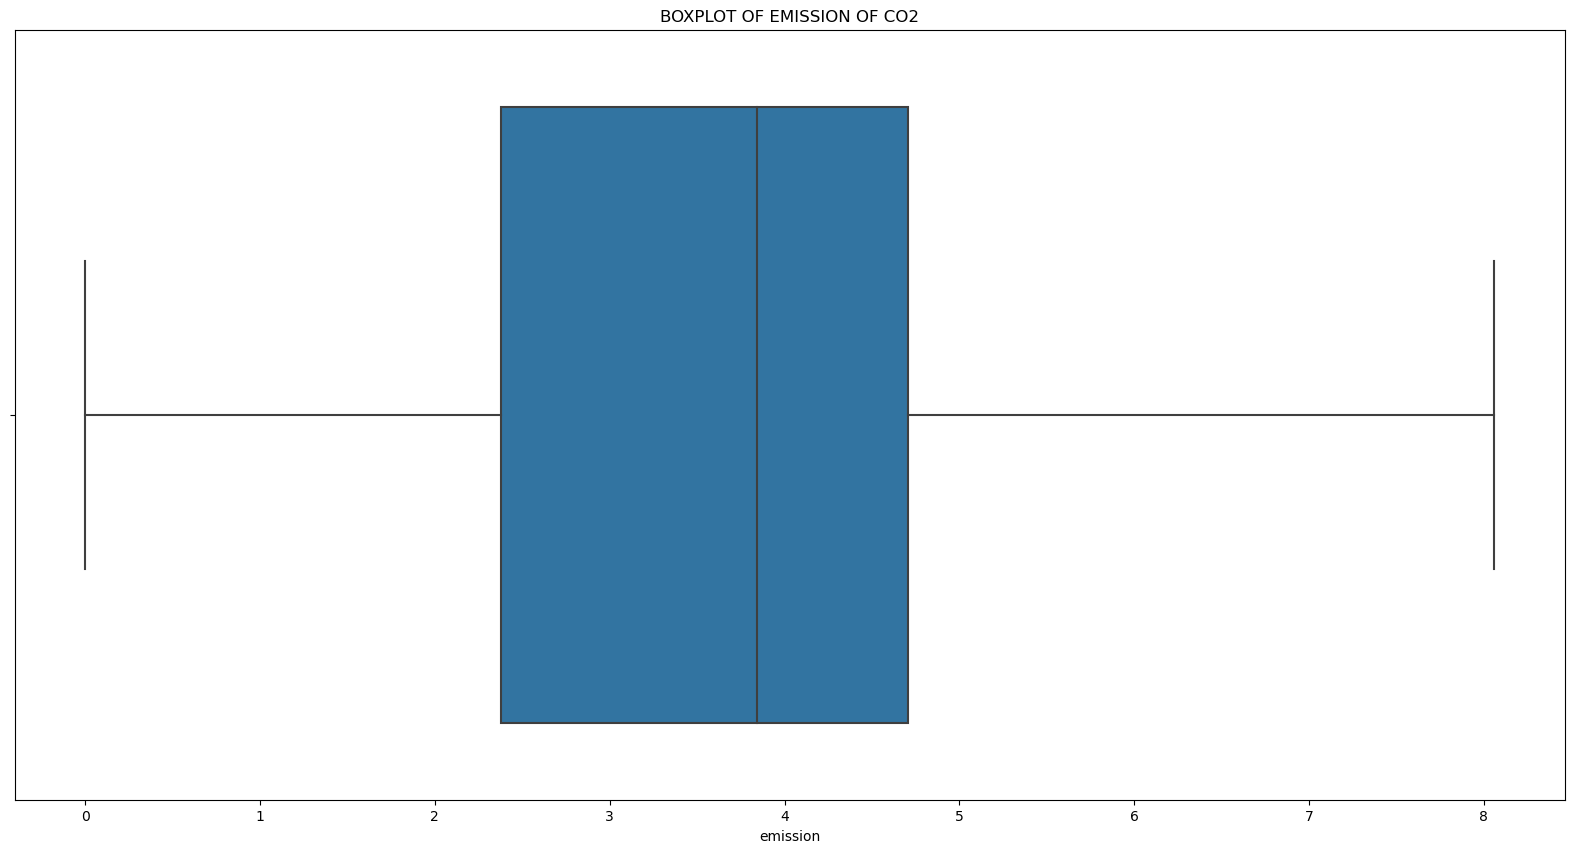

In [40]:
plt.figure(figsize=(20,10))
plt.title(f'BOXPLOT OF emission of CO2'.upper())
sns.boxplot(x = np.log (1 + df['emission']))
plt.show()

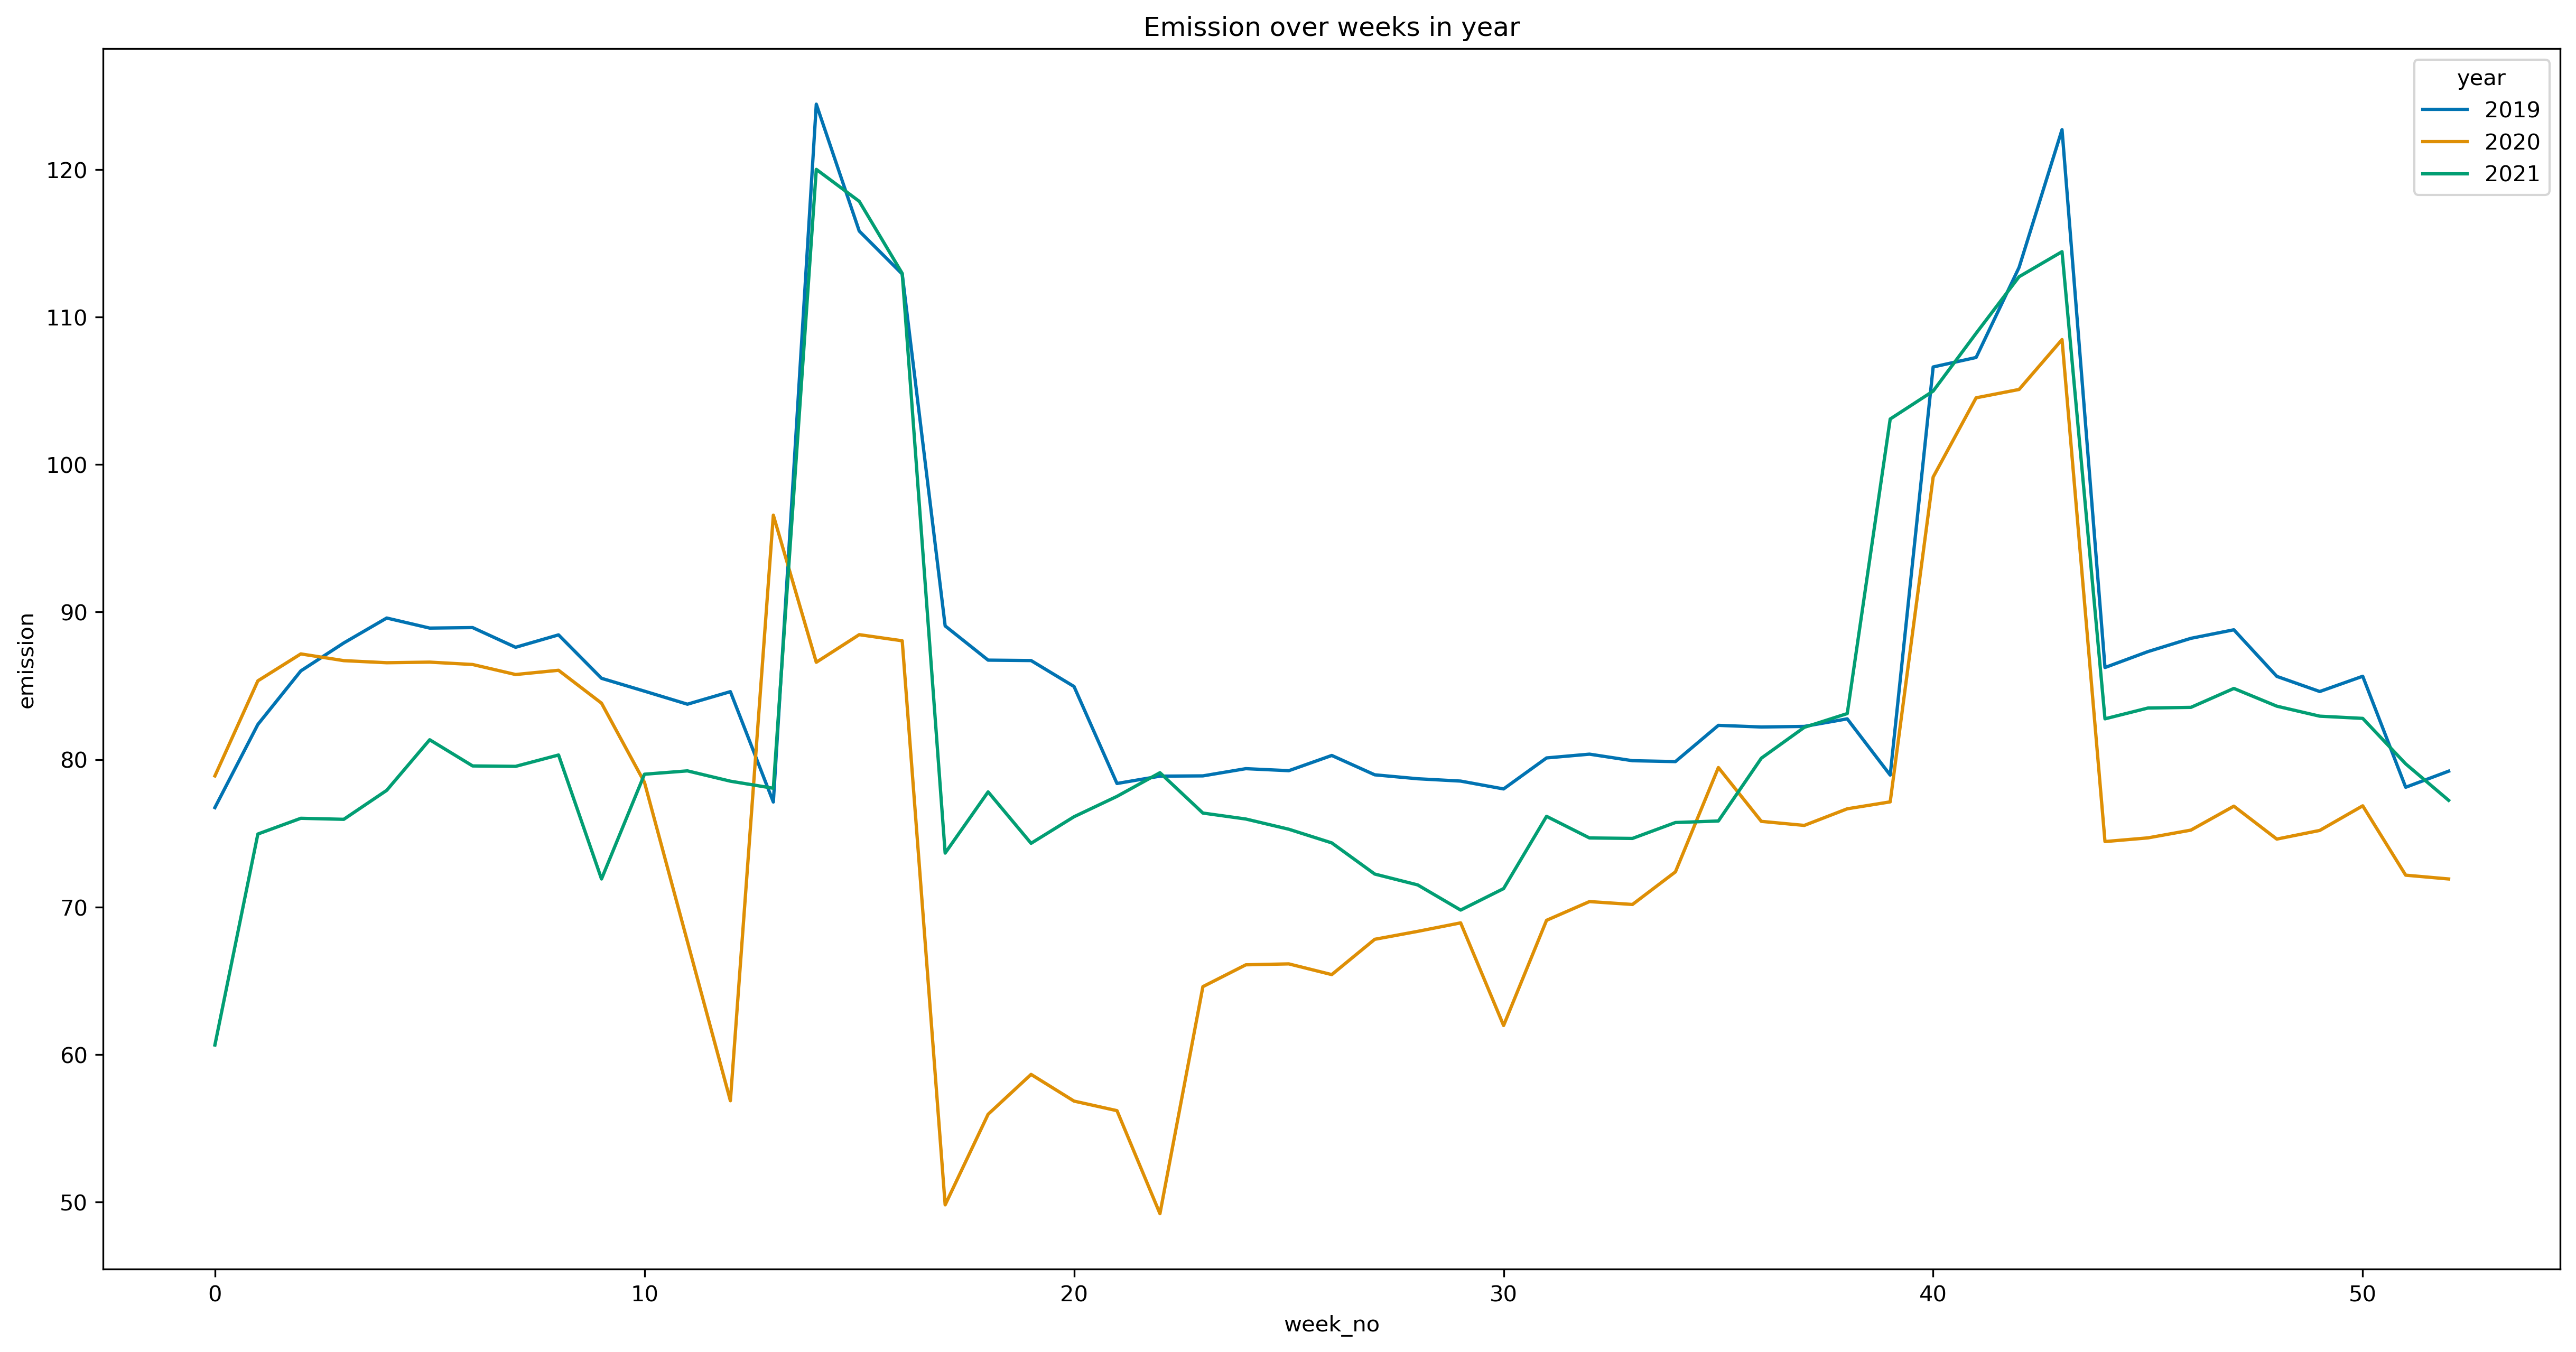

In [41]:
##WEEKLY EMISSION OF CO2

plt.figure(figsize = (20 , 10) , dpi = 300)
sns.lineplot(data = df, x = 'week_no' , y ='emission' , hue = 'year' , errorbar = None , palette = 'colorblind')
plt.title('Emission over weeks in year')
plt.show()

In [73]:
get_country = lambda x : x.raw['address']['country']
get_state = lambda x : x.raw['address']['state']
get_full_address = lambda x : x.raw['display_name']

location = df[['latitude', 'longitude']].drop_duplicates().reset_index().drop('index' , axis = 1)
location['country'] = extraction_result.apply(get_country)
location['state'] = extraction_result.apply(get_state)
location['full_address'] = extraction_result.apply(get_full_address)
location

latitude  longitude                           country      state  \
0      -0.510     29.290  République démocratique du Congo  Nord-Kivu   
1      -0.528     29.472  République démocratique du Congo  Nord-Kivu   
2      -0.547     29.653  République démocratique du Congo  Nord-Kivu   
3      -0.569     30.031                            Uganda    Mitooma   
4      -0.598     29.102  République démocratique du Congo  Nord-Kivu   
..        ...        ...                               ...        ...   
492    -3.153     30.347                           Burundi     Karuzi   
493    -3.161     28.839  République démocratique du Congo   Sud-Kivu   
494    -3.174     29.926                           Burundi     Karuzi   
495    -3.287     29.713                           Burundi   Muramvya   
496    -3.299     30.301                           Burundi     Ruyigi   

                                          full_address  
0    Taliha, Lubero, Nord-Kivu, République démocrat...  
1          Nord-Kivu, République démocratique du Congo  
2    Lulimbi, Rutshuru, Nord-Kivu, République démoc...  
3    Nyakishojwa Central, Mitooma, Western Region, ...  
4    Luofu, Lubero, Nord-Kivu, République démocrati...  
..                                                 ...  
492                                    Karuzi, Burundi  
493  Kitoga, Bafuliro (chefferie), Uvira, Sud-Kivu,...  
494                                    Karuzi, Burundi  
495                          Gatabo, Muramvya, Burundi  
496                         Nyankanda, Ruyigi, Burundi  

[497 rows x 5 columns]

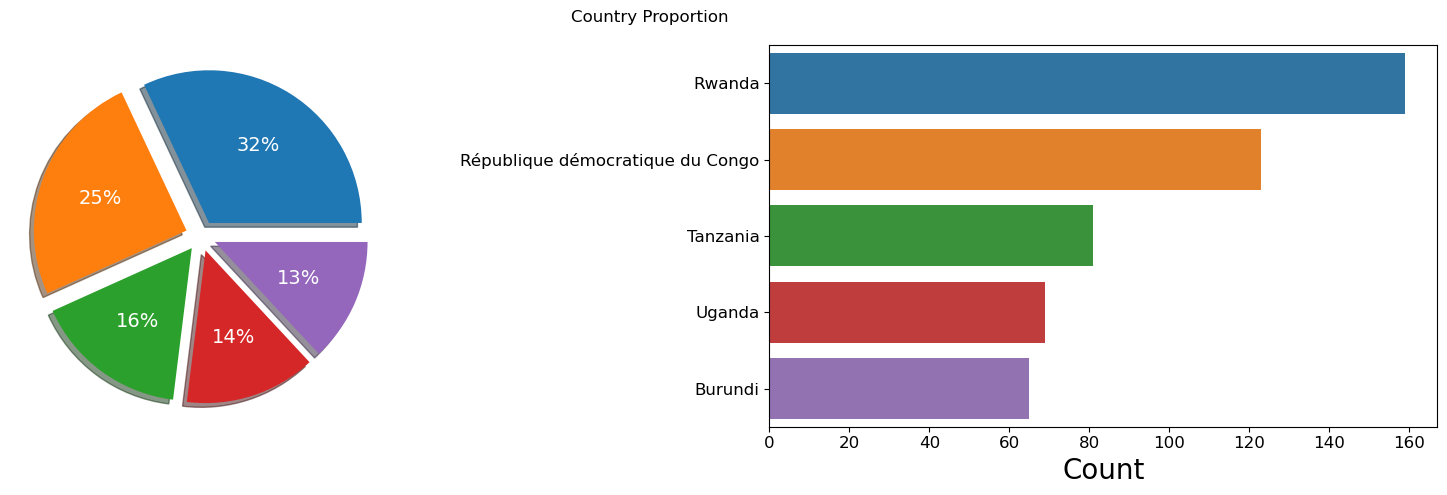

In [74]:
fig , ax = plt.subplots(1 , 2 , figsize = (16 , 5))

ax = ax.flatten()

ax[0].pie(
    location['country'].value_counts(),
    shadow = True,
    explode = [.1 for i in range(0,5)],
    autopct = '%1.f%%',
    textprops = {'size':14 , 'color':'white'}
)

sns.countplot(data = location , y = 'country' , ax = ax[1] , order = location['country'].value_counts().index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 12)
ax[1].set_xlabel('Count' , fontsize = 20)
ax[1].set_ylabel(None)
plt.xticks(fontsize = 12)
fig.suptitle('Country Proportion ')
plt.tight_layout()

In [75]:
#config color scales
fig = px.scatter_mapbox(
    df[['latitude','longitude', 'emission', 'year']].groupby(['latitude','longitude', 'year'])['emission'].mean().reset_index(), 
    lat='latitude', lon='longitude', color='emission', range_color=[0,200], animation_frame = 'year', zoom=6)
fig.update_traces(marker_size=10, marker_opacity=0.8)
fig.update_layout(title_text='Location coordinates',mapbox_style = "open-street-map")
fig.show()

* Emission significantly reduced on COVID times (starts on week 10 2020 and restoring until week 53)
* High emission area appears to concentrate on the middle area, meaning that nearby location could impacting the emission value
* Two location identified (Lake Kivu,Nyamasheke) exhibiting significantly higher average emission levels compared to others.
---- Lake Kivu's emission is significantly rising on Jan-Feb
---- Nyamasheke's emission is relatively stable
* Locations can be grouped as 4 types: Lake Kivu, Nyamasheke, has seasonal pattern, and don't have seasonal pattern


In [42]:
#filtering the multicolinearity

#compute correlation with target feature
corr_df = df.loc[:, ~df.columns.isin(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no','Date', 'location'])].corr()
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_df[mask] = np.nan
emission_corr = abs(corr_df.transpose()['emission']).sort_values(ascending=False)
emission_corr = emission_corr.to_dict()

In [43]:
emission_corr

{'CarbonMonoxide_CO_column_number_density': 0.03914943317617576,
 'NitrogenDioxide_cloud_fraction': 0.024034210759790734,
 'NitrogenDioxide_sensor_azimuth_angle': 0.02357440065828163,
 'Ozone_solar_zenith_angle': 0.022436939149608055,
 'SulphurDioxide_SO2_slant_column_number_density': 0.020014546698377916,
 'NitrogenDioxide_stratospheric_NO2_column_number_density': 0.014354382797964218,
 'Ozone_O3_column_number_density': 0.014004286724036053,
 'CarbonMonoxide_cloud_height': 0.010703570665224926,
 'Ozone_O3_effective_temperature': 0.00961305099616577,
 'NitrogenDioxide_tropospheric_NO2_column_number_density': 0.008590289164841886,
 'SulphurDioxide_cloud_fraction': 0.005420402628188003,
 'SulphurDioxide_SO2_column_number_density_amf': 0.0025518011802117867,
 'NitrogenDioxide_tropopause_pressure': 0.0018273681832234466,
 'CarbonMonoxide_sensor_zenith_angle': 0.0006566578191120571,
 'Ozone_cloud_fraction': 0.0005762456179327573,
 'emission': nan,
 'Month': nan}

In [44]:
#compute high correlation pairs
features_corr = pd.DataFrame(corr_df.drop('emission', axis=1).unstack(), columns=['correlation'])
features_corr['pair'] = features_corr.index
features_corr = features_corr.reset_index()
features_corr['correlation'] = abs(features_corr['correlation'])
features_corr = features_corr[features_corr['correlation'].notna()].sort_values('correlation', ascending=False)

features_corr = (features_corr[features_corr['correlation']>0.8])

In [45]:
features_corr

Empty DataFrame
Columns: [level_0, level_1, correlation, pair]
Index: []

In [46]:
#instead of having good correlation with the target column (emission),
#these columns are higly correlated with each other leading to heteroscadisity hence we have to drop them.

In [44]:
#select one from high correlation pair with highest correlation with target feature
features_corr['to_drop'] = features_corr.apply(
    lambda x: x['level_0'] if emission_corr[x['level_0']] <= emission_corr[x['level_1']] else x['level_1'],
    axis=1
 )
print(f"total {len(features_corr['to_drop'].unique())} to drop:\n {features_corr['to_drop'].unique()}")

ValueError: Cannot set a DataFrame with multiple columns to the single column to_drop

In [45]:
dataset = df.drop([*features_corr['to_drop'].unique()], axis=1)
numerical = dataset.select_dtypes(include =[np.number])

KeyError: 'to_drop'

In [46]:
numerical = dataset.select_dtypes(include =[np.number])
numerical.corr()['emission']

NameError: name 'dataset' is not defined

In [47]:
sulpur_col = [col for col in df.columns if 'Sulphur' in col]
SUL_df = df[sulpur_col]
SUL_df['emission'] = df['emission']
SUL_df.describe().T

count       mean  \
SulphurDioxide_SO2_column_number_density_amf    79023.0   0.825013   
SulphurDioxide_SO2_slant_column_number_density  79023.0   0.000023   
SulphurDioxide_cloud_fraction                   79023.0   0.159307   
emission                                        79023.0  81.940552   

                                                       std       min  \
SulphurDioxide_SO2_column_number_density_amf      0.152546  0.469307   
SulphurDioxide_SO2_slant_column_number_density    0.000135 -0.000273   
SulphurDioxide_cloud_fraction                     0.063832  0.009092   
emission                                        144.299648  0.000000   

                                                     25%        50%  \
SulphurDioxide_SO2_column_number_density_amf    0.730940   0.809118   
SulphurDioxide_SO2_slant_column_number_density -0.000053   0.000019   
SulphurDioxide_cloud_fraction                   0.123332   0.161855   
emission                                        9.797995  45.593445   

                                                       75%          max  
SulphurDioxide_SO2_column_number_density_amf      0.905362     1.166994  
SulphurDioxide_SO2_slant_column_number_density    0.000093     0.000313  
SulphurDioxide_cloud_fraction                     0.199492     0.299998  
emission                                        109.549595  3167.768000

<Axes: title={'center': 'THE CORRELATION BETWEEN SULPHUR VARIABLES AND CO2 EMISSION'}>

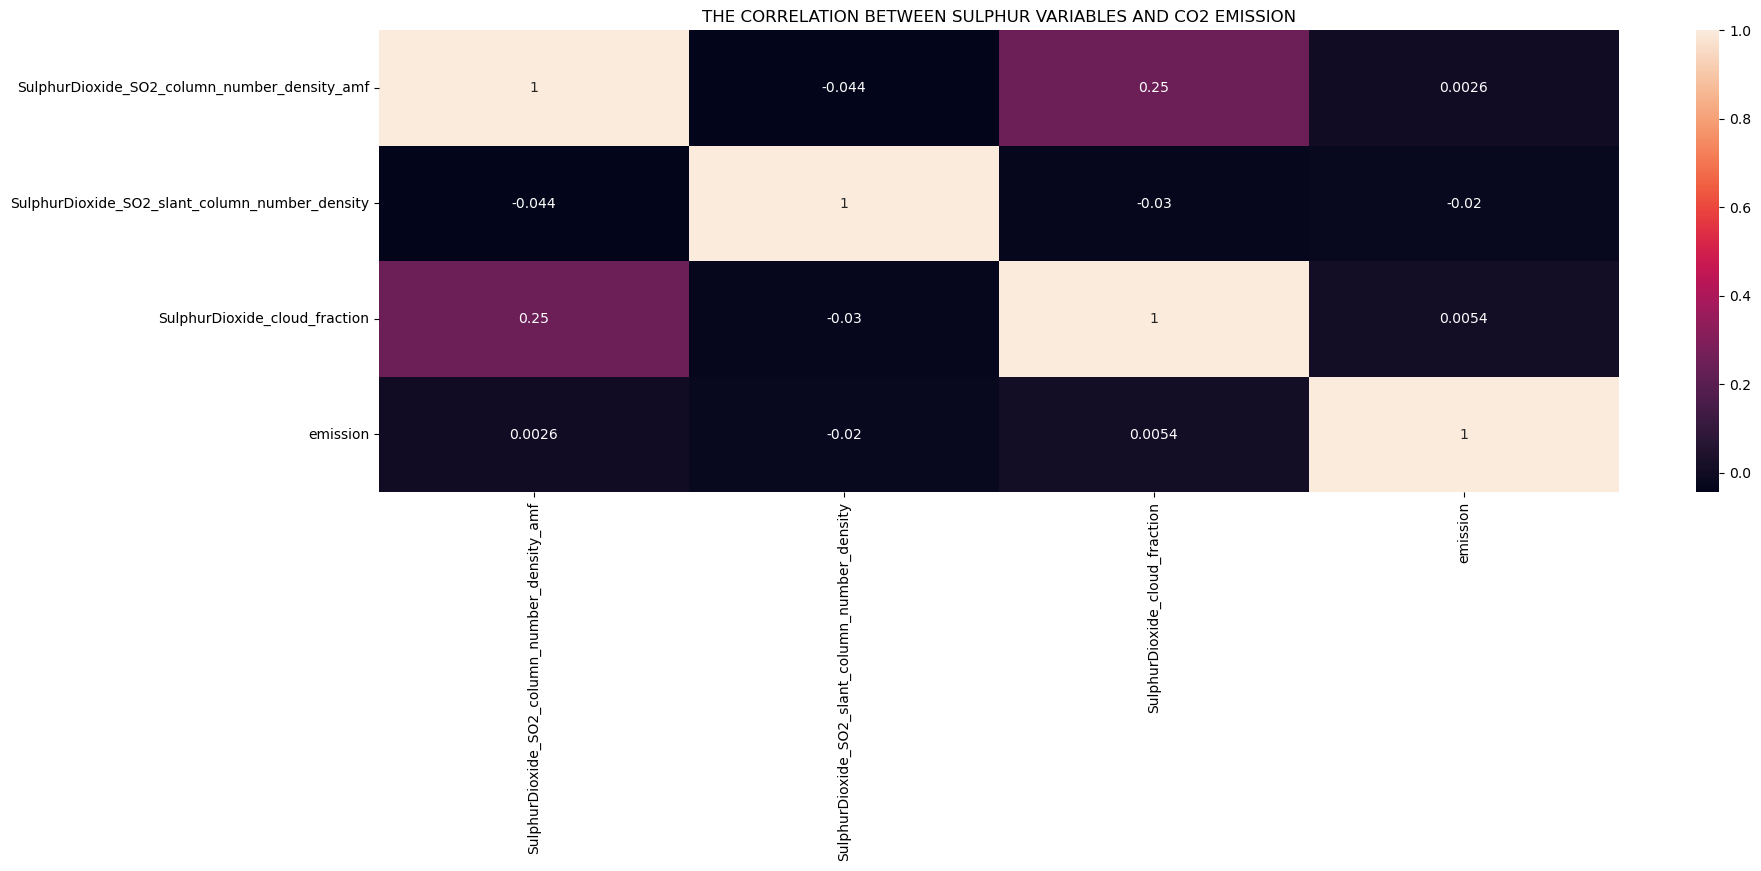

In [48]:
SUL_df.corr()['emission']
plt.figure(figsize=(20, 6))
plt.title('THE CORRELATION BETWEEN SULPHUR VARIABLES AND CO2 EMISSION')
sns.heatmap(SUL_df.corr(), annot = True)

In [49]:
carbon_col = [col for col in df.columns if 'Carbon' in col]
CAR_df = df[carbon_col]
CAR_df['emission'] = df['emission']
CAR_df.describe().T

count         mean         std  \
CarbonMonoxide_CO_column_number_density  79023.0     0.032971    0.005473   
CarbonMonoxide_cloud_height              79023.0  2824.728578  774.679785   
CarbonMonoxide_sensor_zenith_angle       79023.0    37.929864   10.205290   
emission                                 79023.0    81.940552  144.299648   

                                                min          25%          50%  \
CarbonMonoxide_CO_column_number_density    0.019089     0.029163     0.032253   
CarbonMonoxide_cloud_height              777.533393  2321.669562  2852.535556   
CarbonMonoxide_sensor_zenith_angle        13.094216    31.794883    38.220766   
emission                                   0.000000     9.797995    45.593445   

                                                 75%          max  
CarbonMonoxide_CO_column_number_density     0.035880     0.045954  
CarbonMonoxide_cloud_height              3351.093674  4895.229843  
CarbonMonoxide_sensor_zenith_angle         44.261995    62.962663  
emission                                  109.549595  3167.768000

<Axes: title={'center': 'THE CORRELATION BETWEEN CARBON MONOXIDE VARIABLES AND CO2 EMISSION'}>

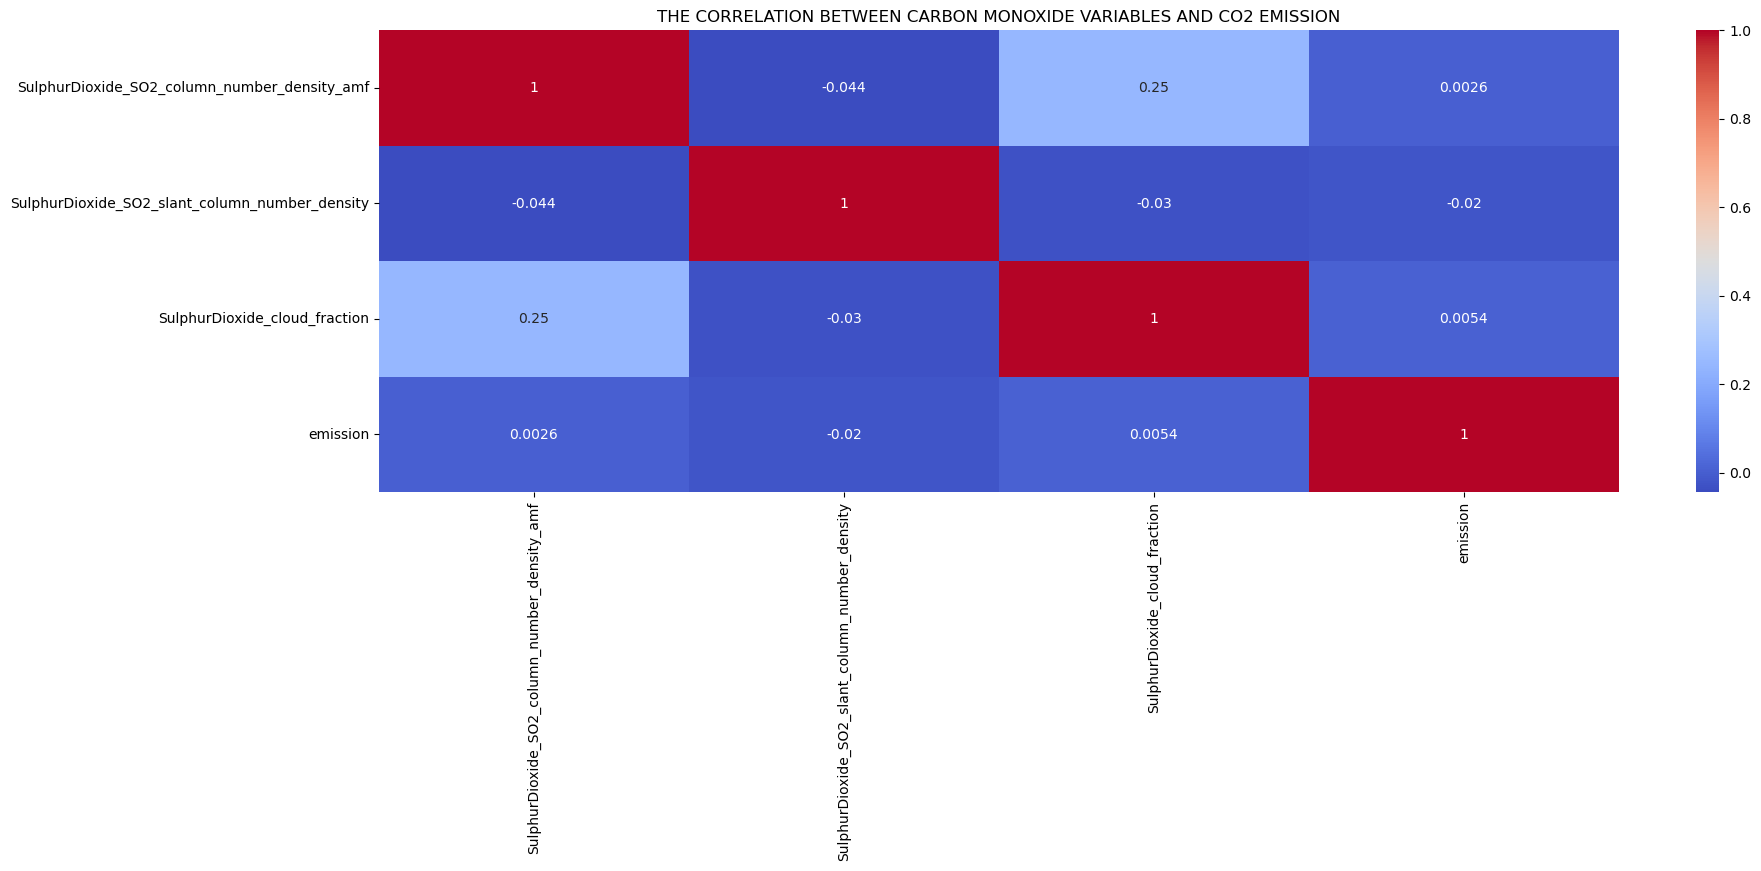

In [50]:
CAR_df.corr()['emission']
plt.figure(figsize=(20, 6))
plt.title('THE CORRELATION BETWEEN CARBON MONOXIDE VARIABLES AND CO2 EMISSION')
sns.heatmap(SUL_df.corr(), annot = True, cmap='coolwarm')

In [51]:
Nitro_col = [col for col in df.columns if 'Nitrogen' in col]
Nitro_df = df[Nitro_col]
Nitro_df['emission'] = df['emission']
Nitro_df.describe().T

count         mean  \
NitrogenDioxide_tropospheric_NO2_column_number_...  79023.0     0.000012   
NitrogenDioxide_stratospheric_NO2_column_number...  79023.0     0.000032   
NitrogenDioxide_tropopause_pressure                 79023.0  8827.829497   
NitrogenDioxide_cloud_fraction                      79023.0     0.092682   
NitrogenDioxide_sensor_azimuth_angle                79023.0   -15.261443   
emission                                            79023.0    81.940552   

                                                           std           min  \
NitrogenDioxide_tropospheric_NO2_column_number_...    0.000006 -3.891948e-07   
NitrogenDioxide_stratospheric_NO2_column_number...    0.000003  2.493169e-05   
NitrogenDioxide_tropopause_pressure                 634.872165  7.647508e+03   
NitrogenDioxide_cloud_fraction                        0.039975  4.423001e-03   
NitrogenDioxide_sensor_azimuth_angle                 59.625891 -1.686026e+02   
emission                                            144.299648  0.000000e+00   

                                                            25%          50%  \
NitrogenDioxide_tropospheric_NO2_column_number_...     0.000009     0.000012   
NitrogenDioxide_stratospheric_NO2_column_number...     0.000030     0.000031   
NitrogenDioxide_tropopause_pressure                 8613.484911  8613.720662   
NitrogenDioxide_cloud_fraction                         0.069729     0.090985   
NitrogenDioxide_sensor_azimuth_angle                 -57.323655   -13.021288   
emission                                               9.797995    45.593445   

                                                            75%           max  
NitrogenDioxide_tropospheric_NO2_column_number_...     0.000015      0.000024  
NitrogenDioxide_stratospheric_NO2_column_number...     0.000033      0.000039  
NitrogenDioxide_tropopause_pressure                 9257.469647  10223.446750  
NitrogenDioxide_cloud_fraction                         0.113267      0.178573  
NitrogenDioxide_sensor_azimuth_angle                  16.862317    122.095200  
emission                                             109.549595   3167.768000

<Axes: title={'center': 'THE CORRELATION BETWEEN NiTROGEN DIOXIDE VARIABLES AND CO2 EMISSION'}>

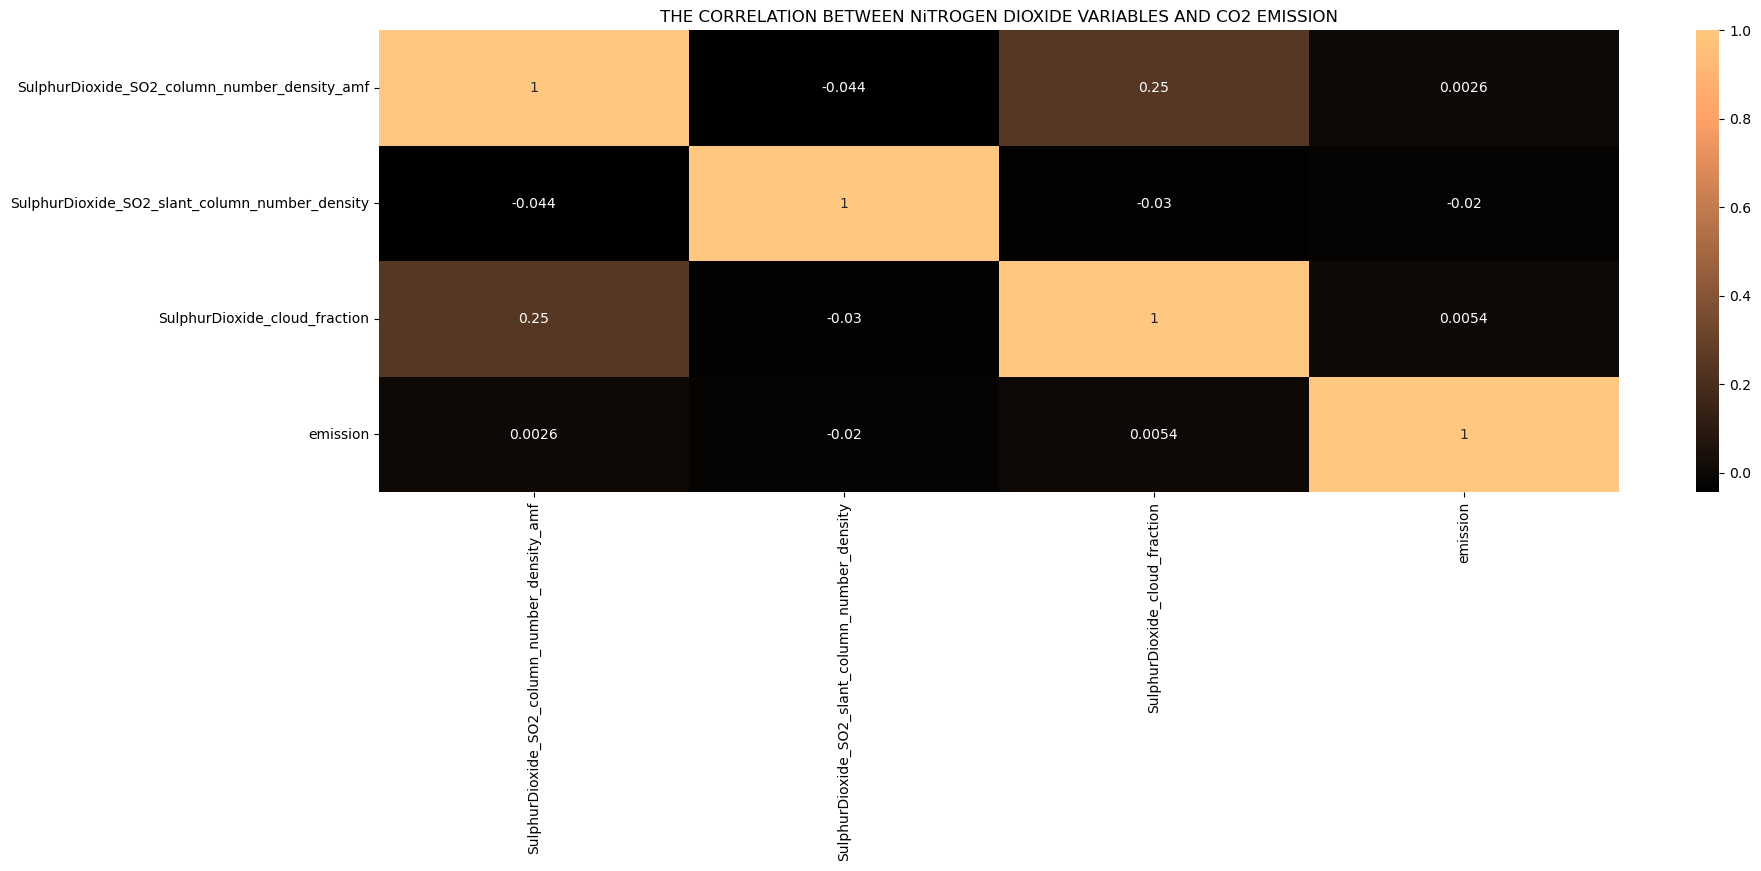

In [52]:
Nitro_df.corr()['emission']
plt.figure(figsize=(20, 6))
plt.title('THE CORRELATION BETWEEN NiTROGEN DIOXIDE VARIABLES AND CO2 EMISSION')
sns.heatmap(SUL_df.corr(), annot = True, cmap='copper')

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [54]:
#SPLITTING THE DATA INTP TRAIN AND TET SET
#X = df.drop(columns=["emission"])
X = df.drop(columns=["emission",'location' ,'Date', 'Month'])
Y = np.log (1 + df["emission"])

In [55]:
##scalling the features and Splitting the dataset into 75% training and 25%testing( this is to avoid overfitting)

scaler = MinMaxScaler()
test = test.drop(columns=['location' ,'Date','Month'])
X =scaler.fit_transform(X)
test =scaler.fit_transform(test)


#X = pd.DataFrame(X, columns=df.drop(columns=['emission']).columns)
X = pd.DataFrame(X, columns=df.drop(columns=['emission','location', 'Date', 'Month']).columns)


x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=2024)

In [56]:
X

latitude  longitude  year   week_no  \
0           1.0   0.321429   0.0  0.000000   
1           1.0   0.321429   0.0  0.019231   
2           1.0   0.321429   0.0  0.038462   
3           1.0   0.321429   0.0  0.057692   
4           1.0   0.321429   0.0  0.076923   
...         ...        ...   ...       ...   
79018       0.0   0.627421   1.0  0.923077   
79019       0.0   0.627421   1.0  0.942308   
79020       0.0   0.627421   1.0  0.961538   
79021       0.0   0.627421   1.0  0.980769   
79022       0.0   0.627421   1.0  1.000000   

       SulphurDioxide_SO2_column_number_density_amf  \
0                                          0.191650   
1                                          0.371092   
2                                          0.399737   
3                                          0.487053   
4                                          0.296678   
...                                             ...   
79018                                      1.000000   
79019                                      0.948221   
79020                                      0.487053   
79021                                      0.587785   
79022                                      0.577113   

       SulphurDioxide_SO2_slant_column_number_density  \
0                                            0.354557   
1                                            0.489074   
2                                            1.000000   
3                                            0.497624   
4                                            0.384730   
...                                               ...   
79018                                        1.000000   
79019                                        0.573709   
79020                                        0.497624   
79021                                        0.418292   
79022                                        0.330417   

       SulphurDioxide_cloud_fraction  CarbonMonoxide_CO_column_number_density  \
0                           0.847615                                 0.606016   
1                           0.419024                                 0.649052   
2                           0.346939                                 0.604824   
3                           0.525128                                 0.658896   
4                           0.385253                                 0.580157   
...                              ...                                      ...   
79018                       0.626392                                 0.275400   
79019                       0.577955                                 0.259079   
79020                       0.525128                                 0.409800   
79021                       0.601973                                 0.443801   
79022                       0.000000                                 0.463865   

       CarbonMonoxide_cloud_height  CarbonMonoxide_sensor_zenith_angle  \
0                         0.797428                            0.795728   
1                         0.265077                            0.519129   
2                         0.493384                            0.787074   
3                         0.762605                            0.533042   
4                         0.458940                            0.413264   
...                            ...                                 ...   
79018                     0.463697                            0.940369   
79019                     0.412165                            0.453985   
79020                     0.411151                            0.679997   
79021                     0.761215                            0.391698   
79022                     0.571825                            0.349559   

       NitrogenDioxide_tropospheric_NO2_column_number_density  \
0                                               0.496797        
1                                               0.688845        
2                                               0.0

In [57]:
###BULDING LINEAR REGRESSION MODEL
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)
linear_mse = mean_squared_error(y_test, y_predict)
Linear_r2 = r2_score(y_test, y_predict)
linear_mse ,Linear_r2

(2.4330250037332233, 0.13039131043960617)

In [58]:
#### Random Forest Regressor Model
rdf = RandomForestRegressor()
rdf.fit(x_train, y_train)
y_predict_rdf = rdf.predict(x_test)
rdf_mse = mean_squared_error(y_test, y_predict_rdf)
rdf_r2  = r2_score(y_test, y_predict_rdf)
rdf_mse,rdf_r2  

(0.01932023203529064, 0.993094587340273)

In [67]:
#### K Nearest nEIGHBOR Regressor Model
knn= KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
y_predict_knn = knn.predict(x_test)
knn_mse = mean_squared_error(y_test, y_predict_knn)
knn_r2  = r2_score(y_test, y_predict_knn)
knn_mse, knn_r2

AttributeError: 'NoneType' object has no attribute 'split'

In [64]:
#### SUPPORT VECTOR MACHINE Regressor Model
svm= SVR()
svm.fit(x_train, y_train)
y_predict_svm = svm.predict(x_test)
svm_mse = mean_squared_error(y_test, y_predict_svm)
svm_r2 = r2_score(y_test, y_predict_svm)
svm_mse, svm_r2

(1.710532966524591, 0.38862349166699983)

In [65]:
### Decision Tree Regressor Model 
dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)
y_predict_dtr = dtr.predict(x_test)
dtr_mse = mean_squared_error(y_test, y_predict_dtr)
dtr_r2  = r2_score(y_test, y_predict_dtr)
dtr_mse, dtr_r2 

(0.03573527168983146, 0.9872275448309834)

In [66]:
### XGB Regressor Model 
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_predict_xgb = xgb.predict(x_test)
xgb_mse = mean_squared_error(y_test, y_predict_xgb)
xgb_r2  = r2_score(y_test, y_predict_xgb)
xgb_mse,xgb_r2

(0.030931373510907367, 0.9889445479829222)

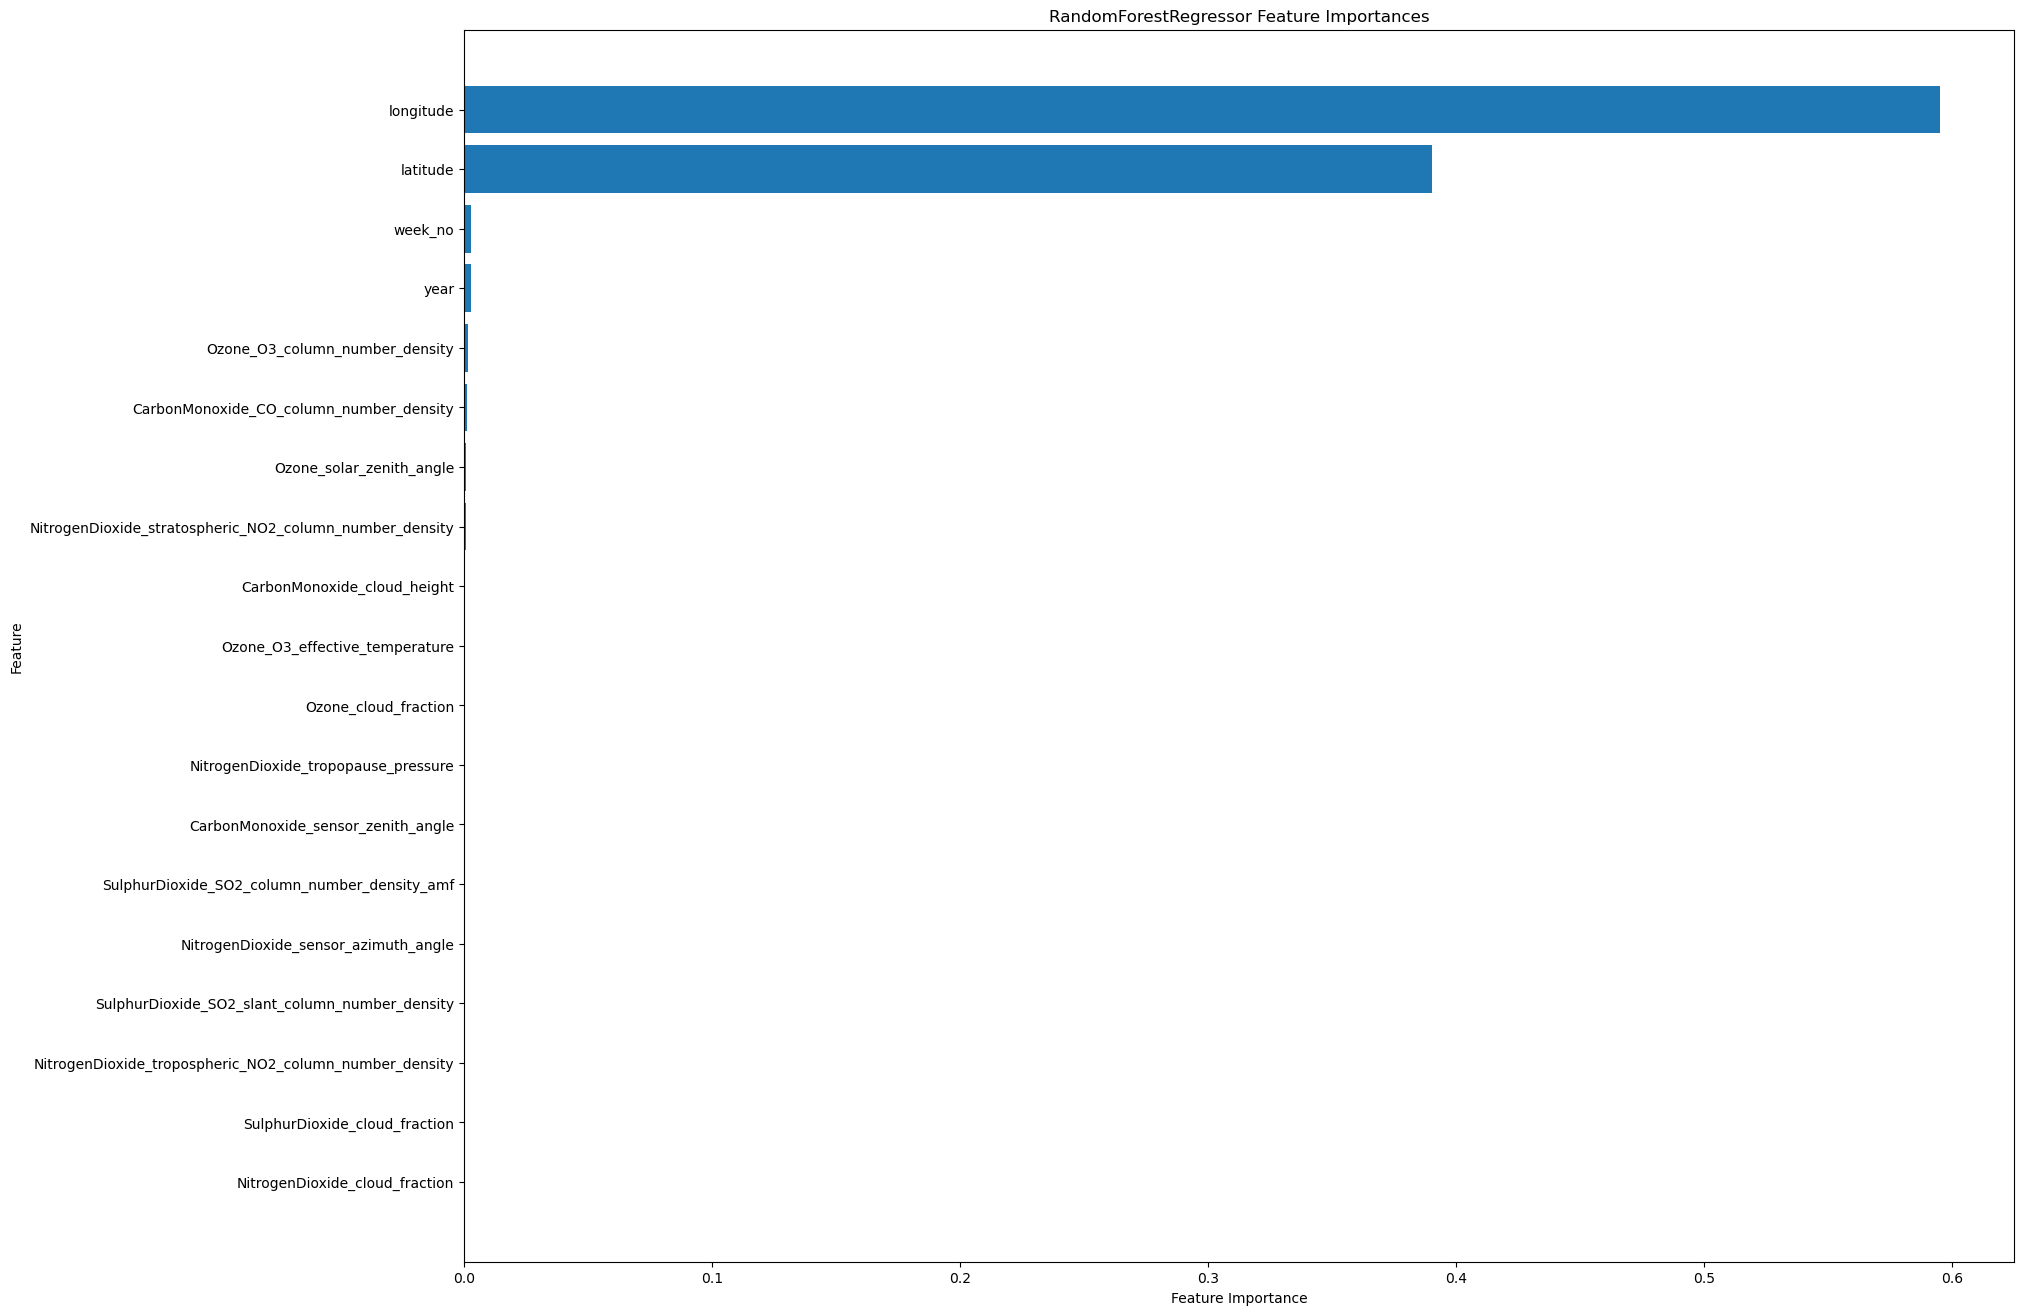

In [59]:
feature_importances = rdf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)

plt.figure(figsize=(20, 16))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices])
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('RandomForestRegressor Feature Importances')
plt.show()

In [65]:
# pickling the model 
import pickle 
import streamlit as st

pickle_out = open("rdf_regression.pkl", "wb") 
pickle.dump(rdf, pickle_out) 
pickle_out.close()

In [60]:
###3save model 
import pickle
data = {'model' : rdf}
with open ('saved_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [61]:
###loading the file
with open ('saved_model.pkl', 'rb') as file:
    data_load = pickle.load(file)
    
regressor_model = data['model']    


In [62]:
trial = regressor_model.predict(x_test)

In [63]:
trial

array([0.56407938, 2.42059855, 4.16498852, ..., 5.4263342 , 5.17770592,
       3.11290128])